Wir führen eine Voranalyse für das Bundesamt für Statistik durch, um die kürzlich aufgetretenen Leaks aus den Offshore Papers zu untersuchen. 

Diese Analyse zielt darauf ab, Umfang und Natur der Verbindungen in Schweizer Offshore-Strukturen zu ermitteln. Wir verwenden dafür Daten aus der [Offshore Leaks Database](https://offshoreleaks.icij.org/), um mögliche Muster, wichtige Personen aufzudecken, die für die Steuerbehörden oder Regulierungsorgane von Interesse sein könnten. Für folgende Analysen beschäftigen wir uns nur mit dem Pandora Papers Subset der Offshore Leaks Datenbank.

Unsere Arbeit umfasst eine detaillierte Prüfung der betroffenen Entitäten. Dies wird es dem Bundesamt für Statistik ermöglichen, fundierte Entscheidungen zur weiteren Untersuchung und möglichen Massnahmen zu treffen.


In diesem Notebook führen wir alle Ergebnisse unserer einzelnen Analysen zusammen.
Die einzelnen Analysen sind in den Jupyter Notebooks im [Repository](https://github.com/gabrieltorresgamez/fhnw-san-project) zu finden.

## Explorative Datenanalyse
Für diese Explorative Datenanalyse nutzen wir einen Subgraph, welcher nur Connected Components beinhaltet, welche mindestens eine Schweizer Adresse beinhalten, da wir sonst sehr viele Connected Components haben und wenige davon für unsere Analyse relevant sind.

### Struktur der Daten
Die ICIJ Datenbank gibt uns bereits eine gute Visualisierung der Datenstruktur. Hier sehen wir die Edges zwischen den 4 wichtigsten Nodetypen (Node mit Typ Others wurden nicht berücksichtigt). Hier wurden jedoch aus Platzgründen nicht alle Kantenverbindungen oder Selfloops dargestellt:

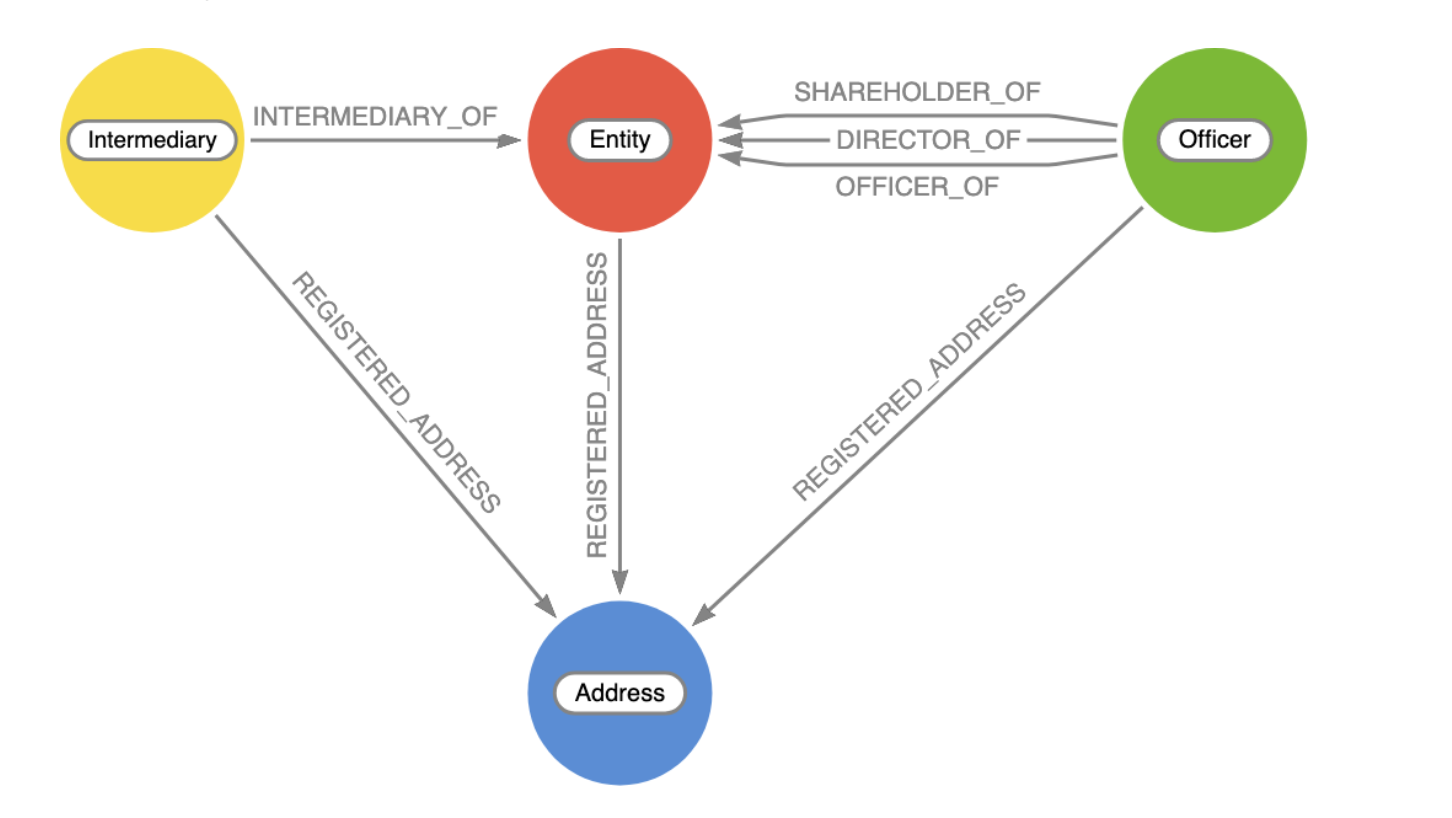

Es gibt einige Edges zwischen Intermediary und Officer, jedoch sind diese eher selten und nicht für unsere Analyse relevant. Die Verbindung zwischen Officer und Intermediary wird stattdessen über die Entity hergestellt.

### Anzahl der Nodes pro Typ

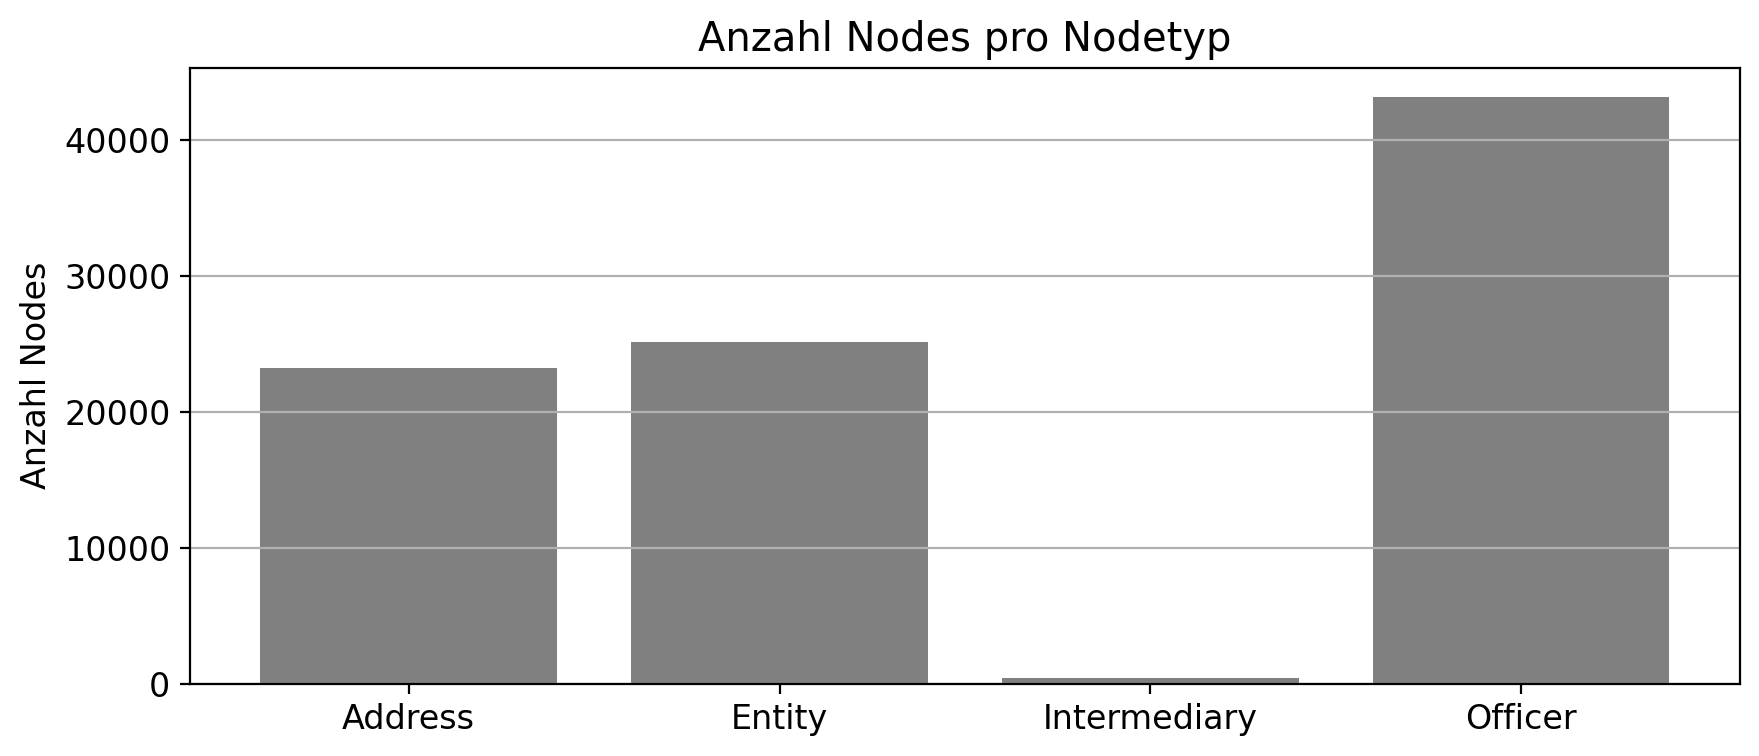

Wir haben Verglichen zu den Officers recht wenig Entitäten. Dies weisst darauf hin, dass es durchschnittlich mehr als ein Officer pro Entität gibt. Es gibt auch sehr weniger Intermediaries als Officers. Es gibt auch recht wenige Addressen, entweder weil einige Officers, Entitäten oder Intermediaries keine Adresse haben oder weil mehrere Nodes die gleiche Adresse haben.

### Grösse der Connected Components

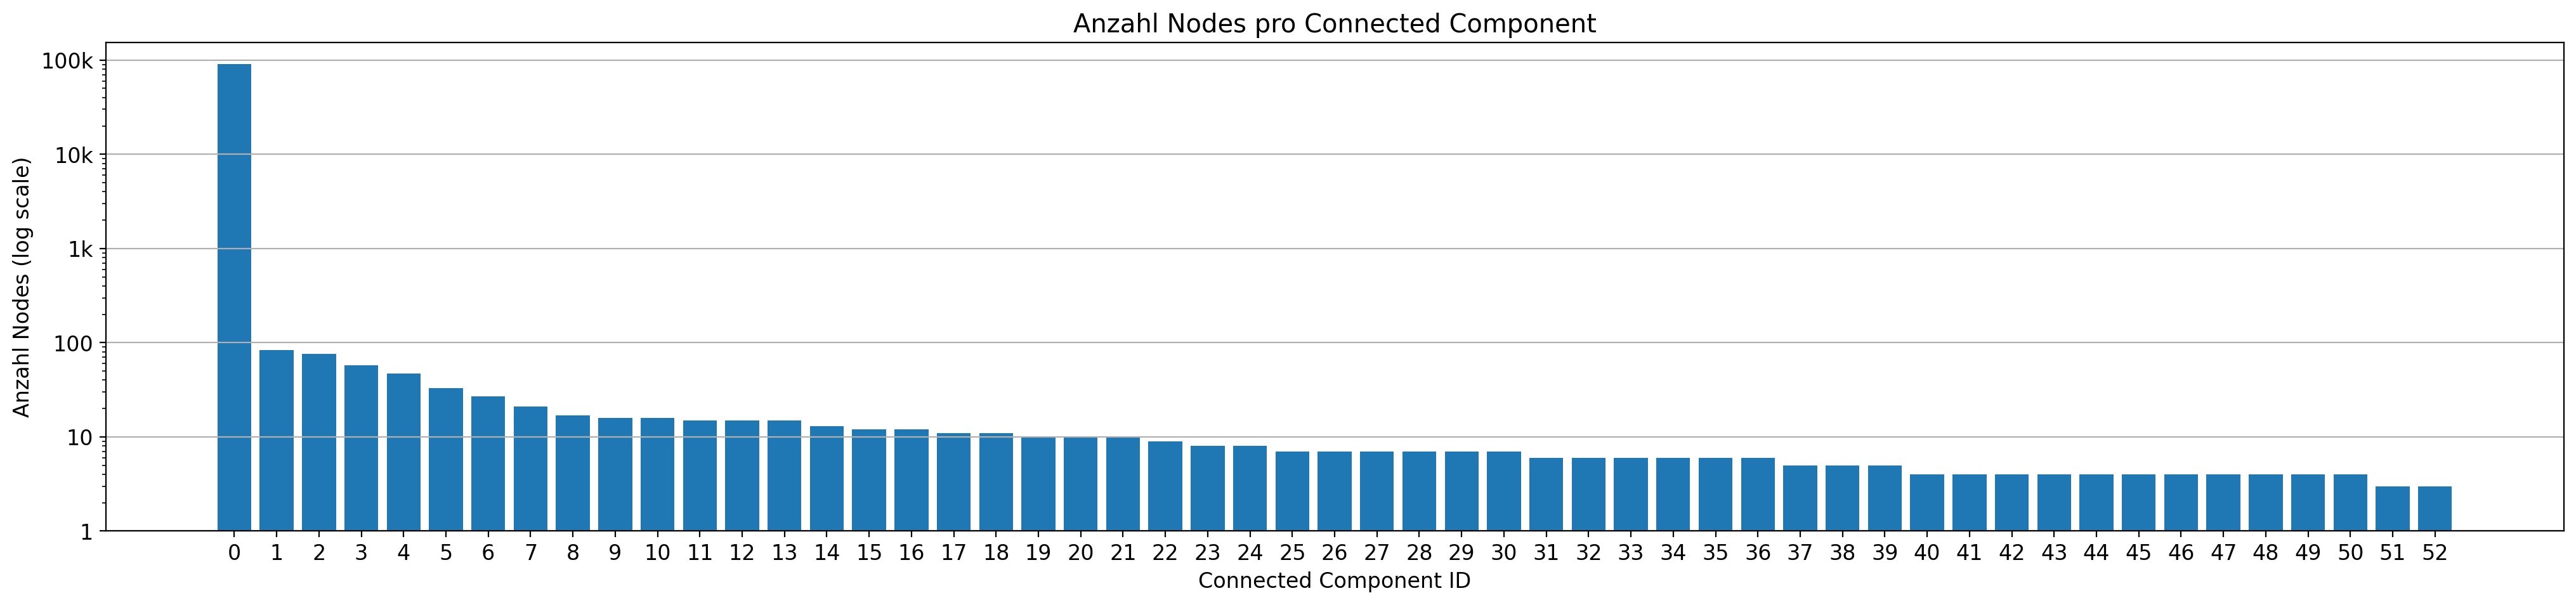

Es existiert ein grosser Component, welcher fast 100'000 Nodes enthält. Der nächstgrösste Component enthält nur etwa 100 Nodes.

### Density

Density (Dichte) misst, wie nah ein Graph einem vollständigen Graphen ist, bei dem alle Knotenpaare verbunden sind. 
Sie wird berechnet als $D = 2E / (N(N-1))$, wobei $E$ die Anzahl der Kanten und $N$ die Anzahl der Knoten ist. 
Eine höhere Dichte zeigt mehr Kanten im Verhältnis zu den Knoten an, was auf ein stark vernetztes Netzwerk hinweist.

Für die Analyse der Density machen wir eine Newman's Weighted Projection auf alle Officers und filtern alle Officers eines Landes heraus und berechnen die Density dieses Subgraphes. Aus Platzgründen wurden nur die Länder mit über 1'000 Officers visualisiert.

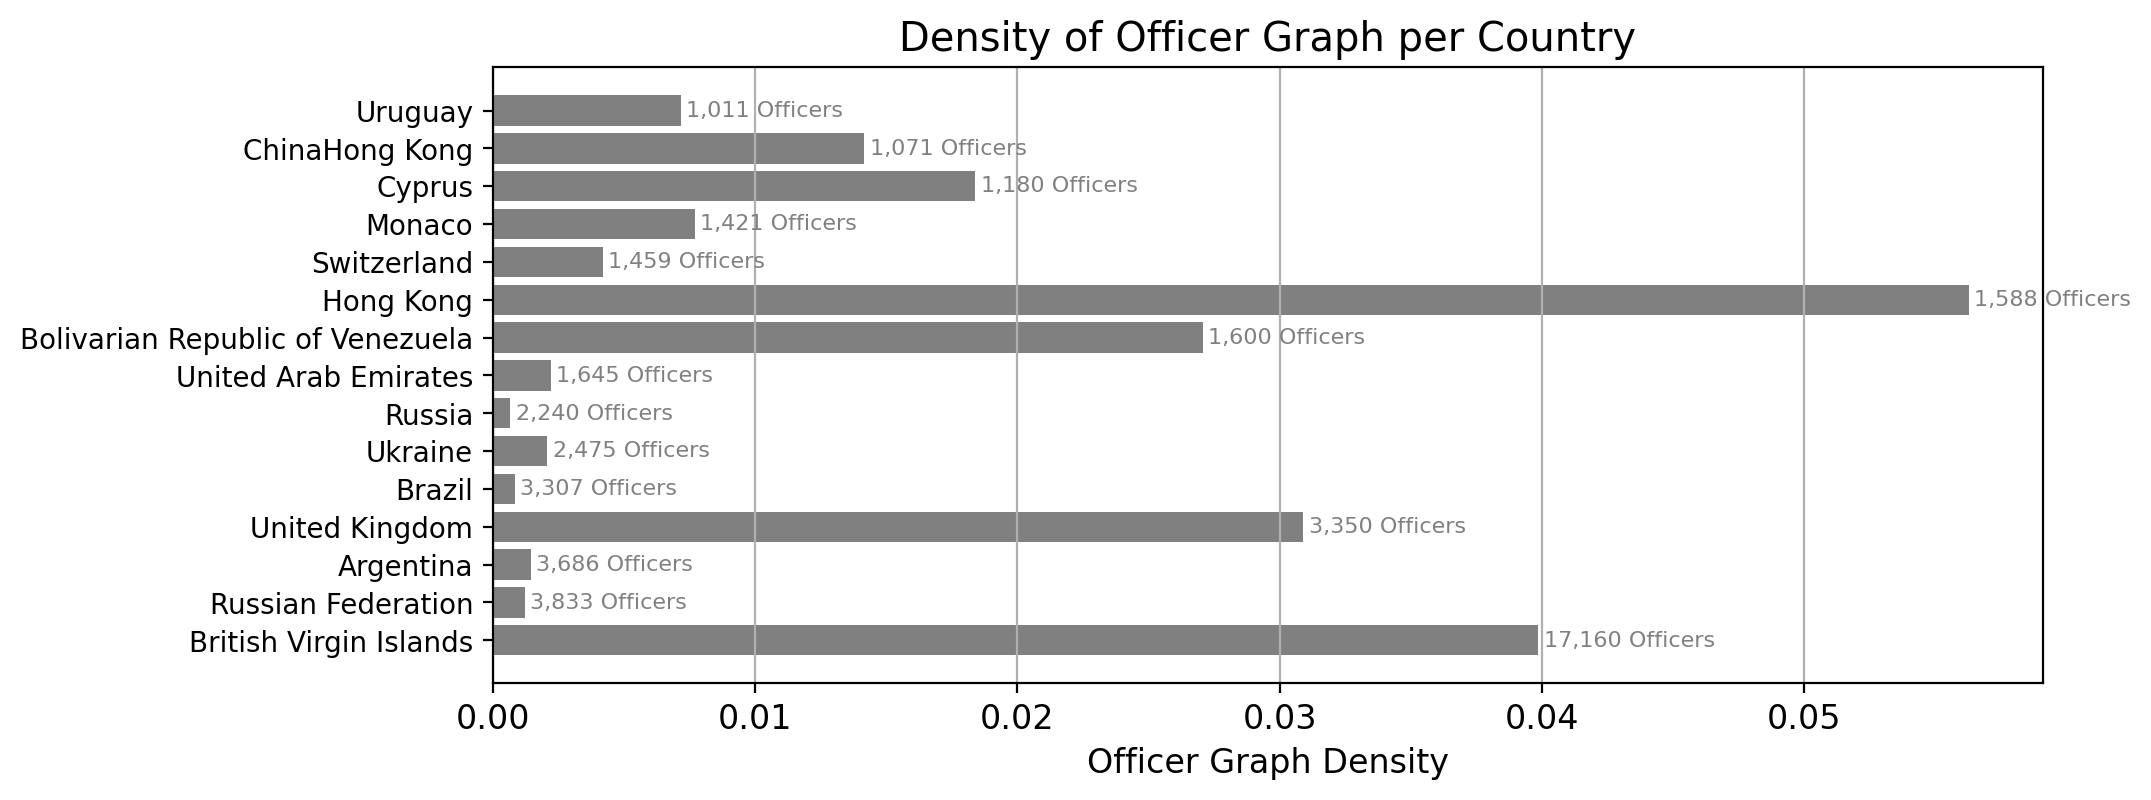

Schweizer Officer scheinen, im Vergleich zu den anderen Ländern mit über 1000 Officers in unserem Datensatz, nicht allzu stark mtieinander vernetzt zu sein.

### Group Centrality

Gruppenzentralität (Group Centrality) misst die Wichtigkeit einer Gruppe von Knoten in einem Netzwerk. Sie bewertet, wie zentral die Gruppe im Gesamtnetzwerk ist, basierend auf verschiedenen Zentralitätsmassen wie Degree, Closeness oder Betweenness. Degree-Zentralität betrachtet die Anzahl der direkten Verbindungen eines Knotens, während Closeness-Zentralität bewertet, wie kurz die durchschnittlichen Distanzen eines Knotens zu allen anderen Knoten sind. Eine hohe Gruppenzentralität zeigt, dass die Knotengruppe eine Schlüsselrolle in der Kommunikation oder im Informationsfluss des Netzwerks spielt.

Für diese Analyse erstellen wir pro Land eine Global View, bei welcher alle Nodes dieses Landes zu einer Node zusammengefasst werden. Darauf berechnen wir die Degree Centrality und die Closeness Centrality.

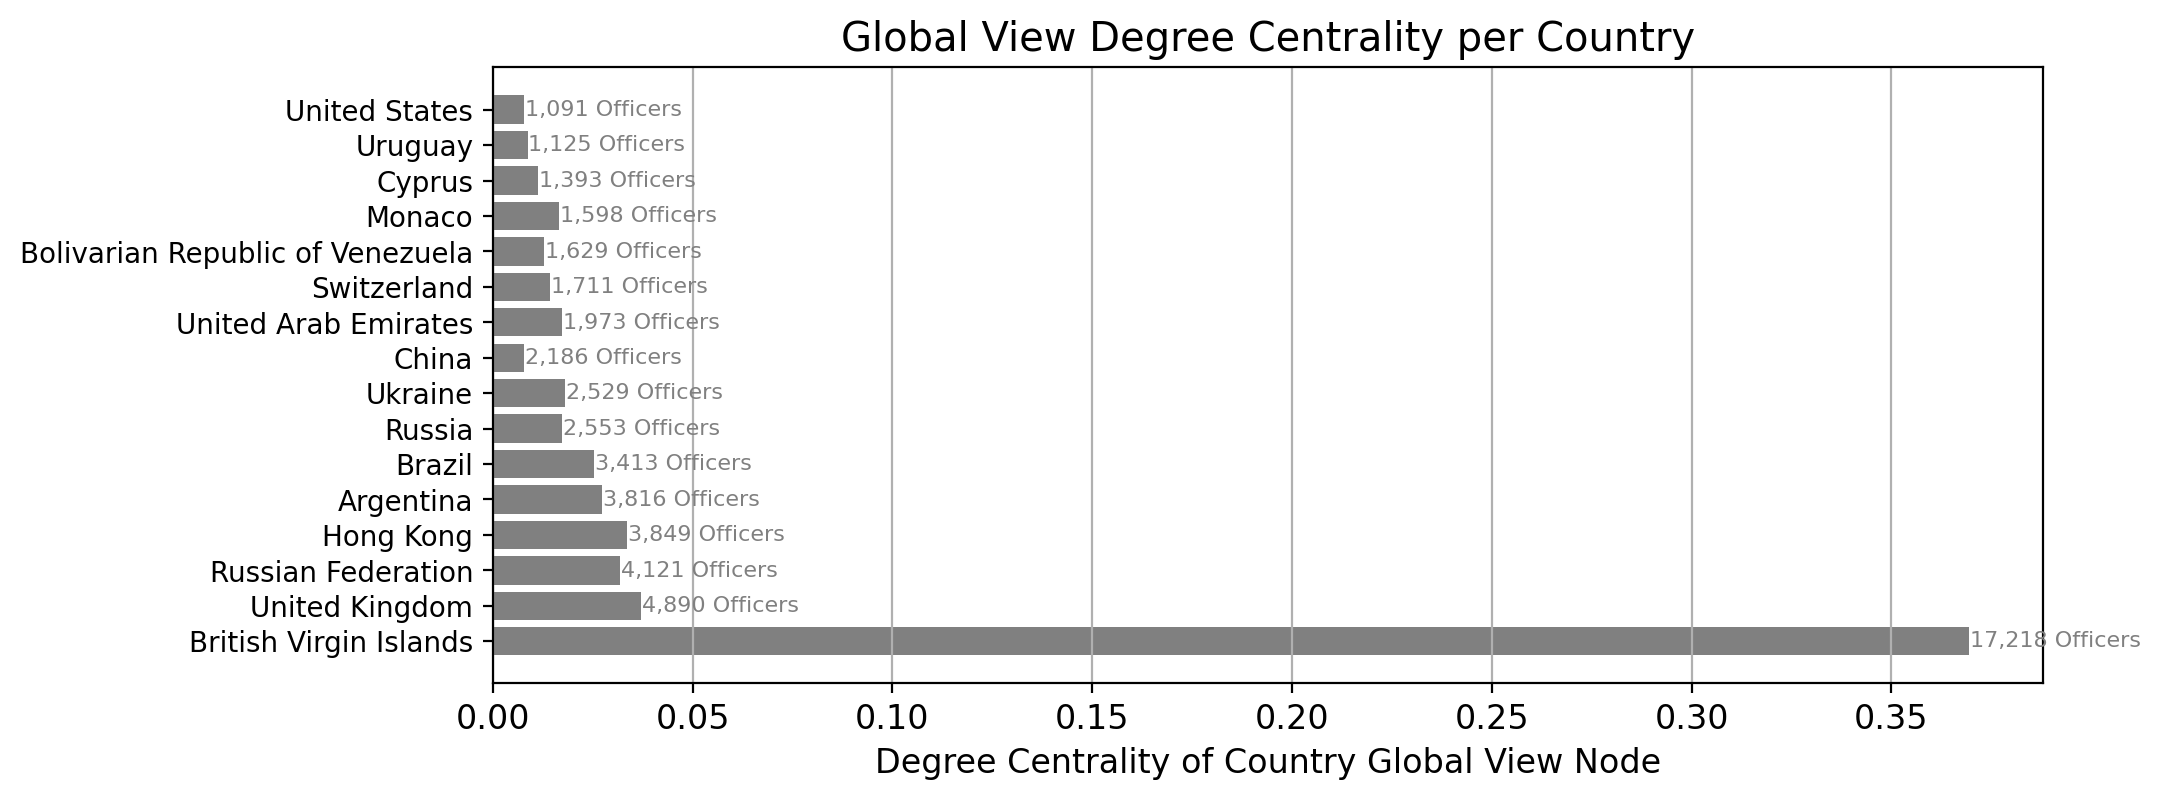

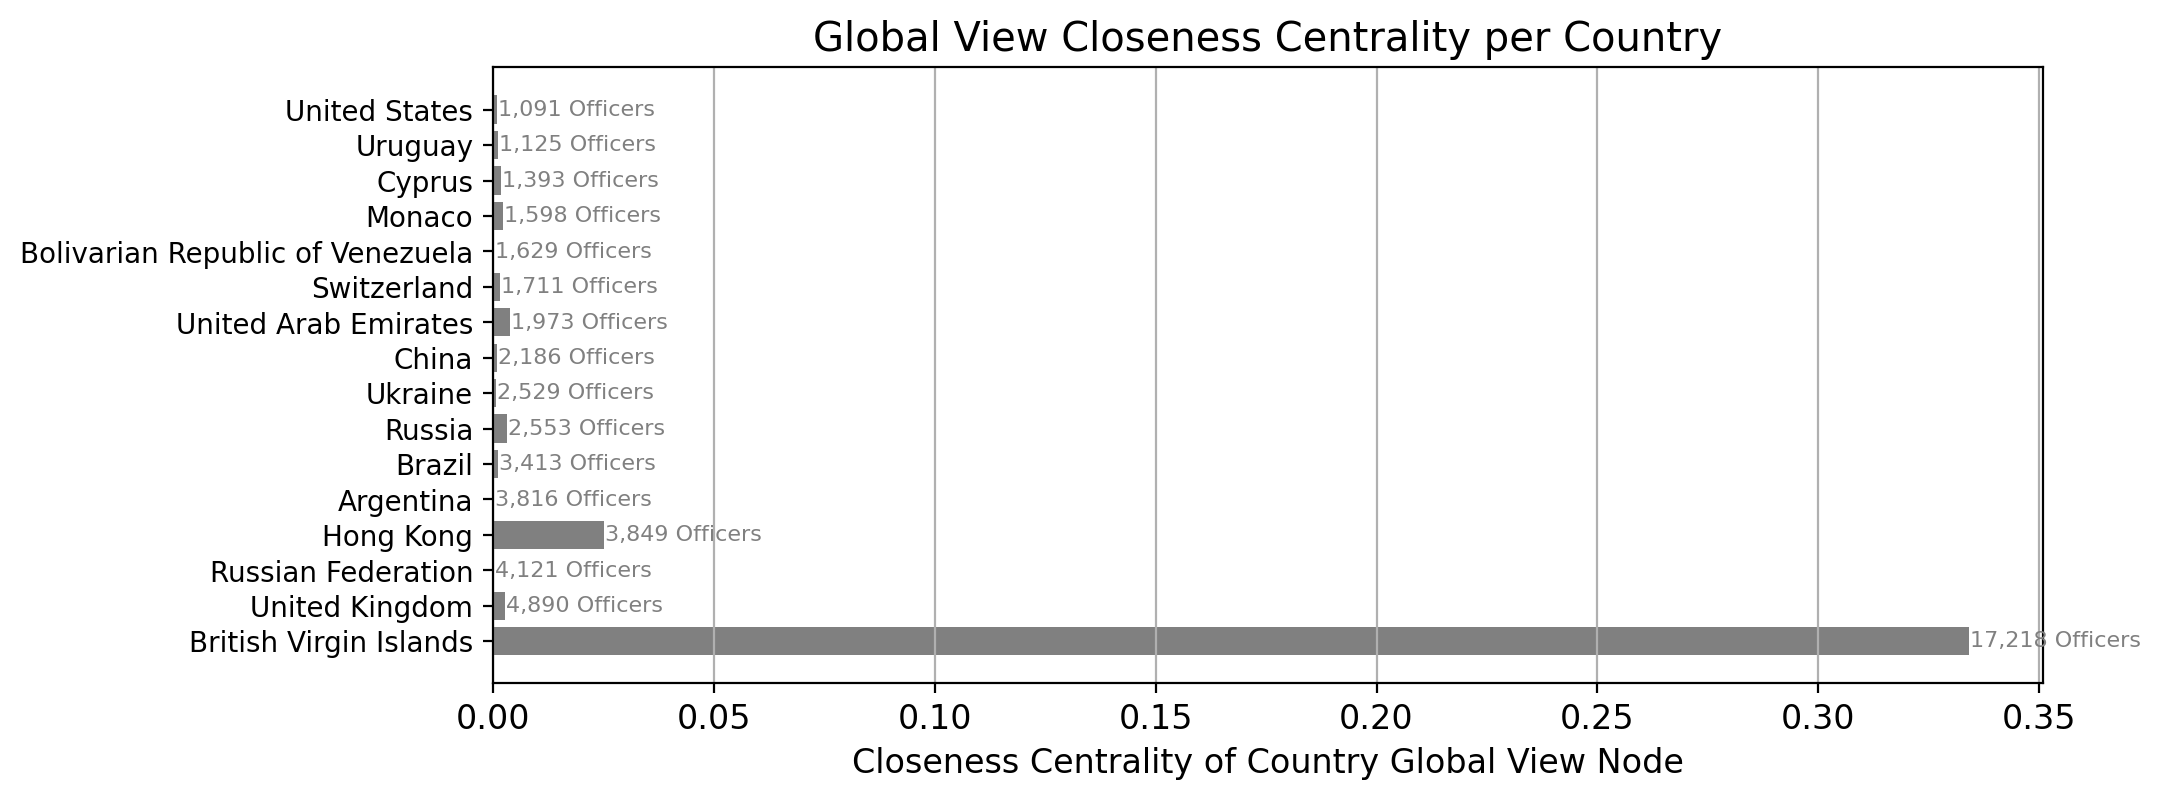

Hier scheinen die Schweiz im Vergleich zu den anderen Ländern nicht besonders Zentral zu sein. Besonders die British Virgin Islands scheinen im Vergleich zu den anderen Ländern sehr zentral zu sein.

## Welches sind die grössten Officergruppen/Cliquen und wie viel Prozent der Schweizer Officers gehören ihnen an?

Für diese Analyse mergen wir Nodes mit den gleichen Attributen, entfernen parallele Edges mit dem gleichen Verbindungstyp und reduzieren unser Netzwerk mittels einer Unweighted Projection auf die Officer. 

### Cliquenanalyse

In der folgenden Visualisierung haben wir zwei verschiedene Untervisualisierungen. Die linke zeigt die Häufigkeit der schweizer Officers pro schweizer Officer Ratio und die rechte zeigt den durchschnittlichen schweizer Officer Ratio pro Maximalclique.

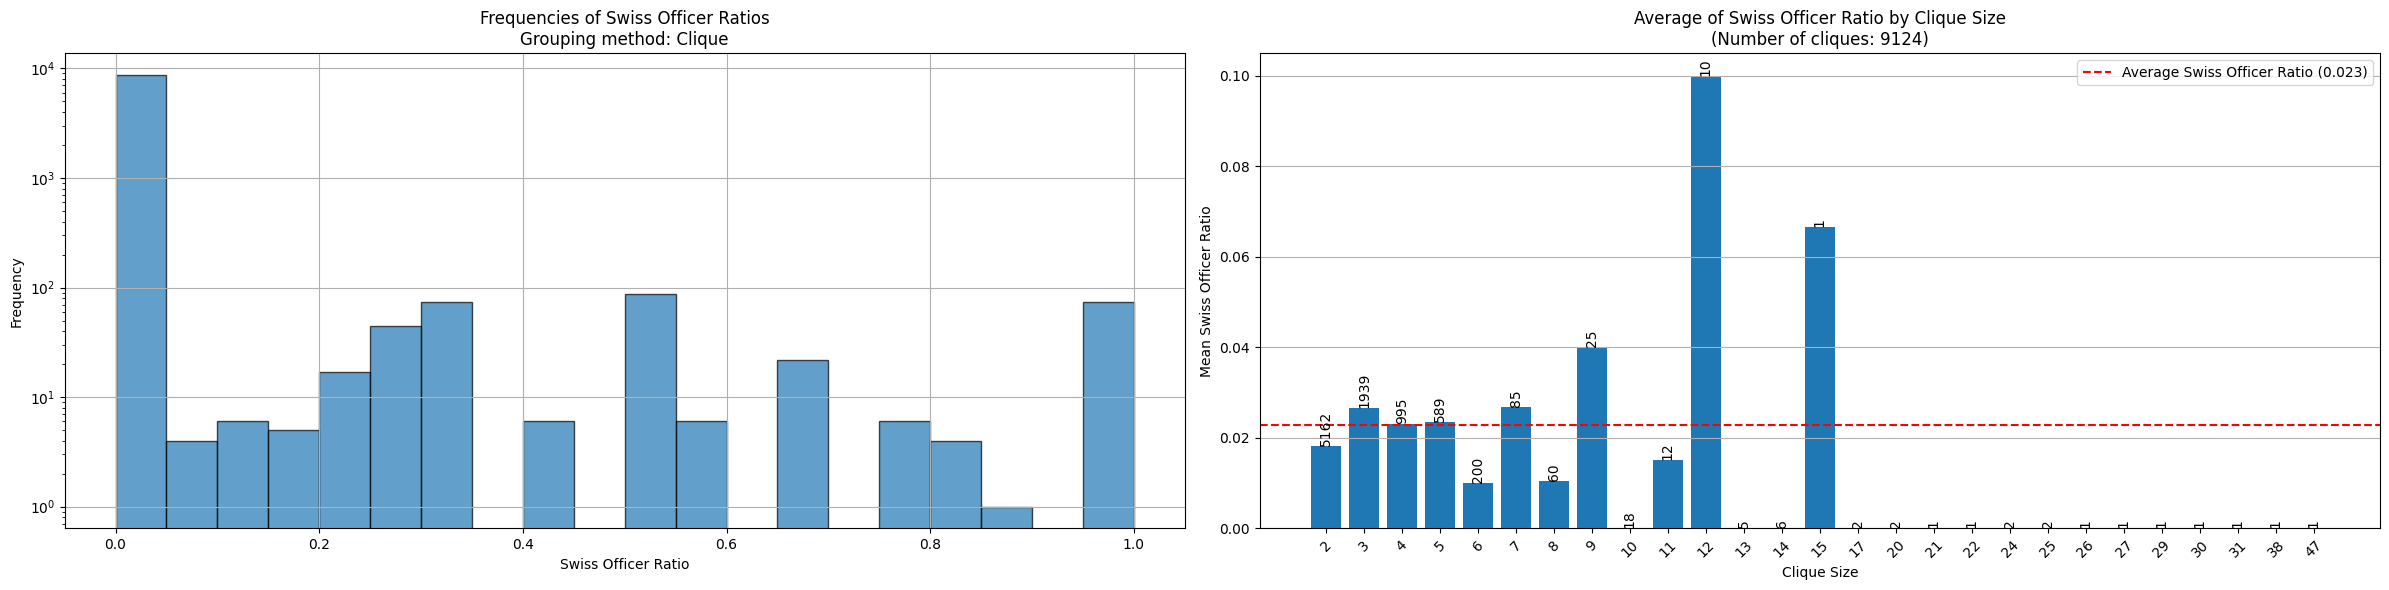

In den meisten Cliquen gibt es keine Schweizer Offiziere. Der durchschnittliche Anteil der Schweizer Offiziere (pro Clique) beträgt 0,0227. Es scheint nicht viele interessante Muster zu geben. Interessant ist, dass es nicht viele Cliquen gibt, in denen das Verhältnis der Schweizer Offiziere nahe bei 0 oder 1 liegt, aber auch nicht genau 0 oder 1 (wie im Histogramm dargestellt). Dies könnte daran liegen, dass die Stichprobengrösse zu klein ist (es gibt nur sehr wenige grosse Cliquen).

### Modularity Analyse

TODO Beschreiben, was man sieht und was Modularity ist

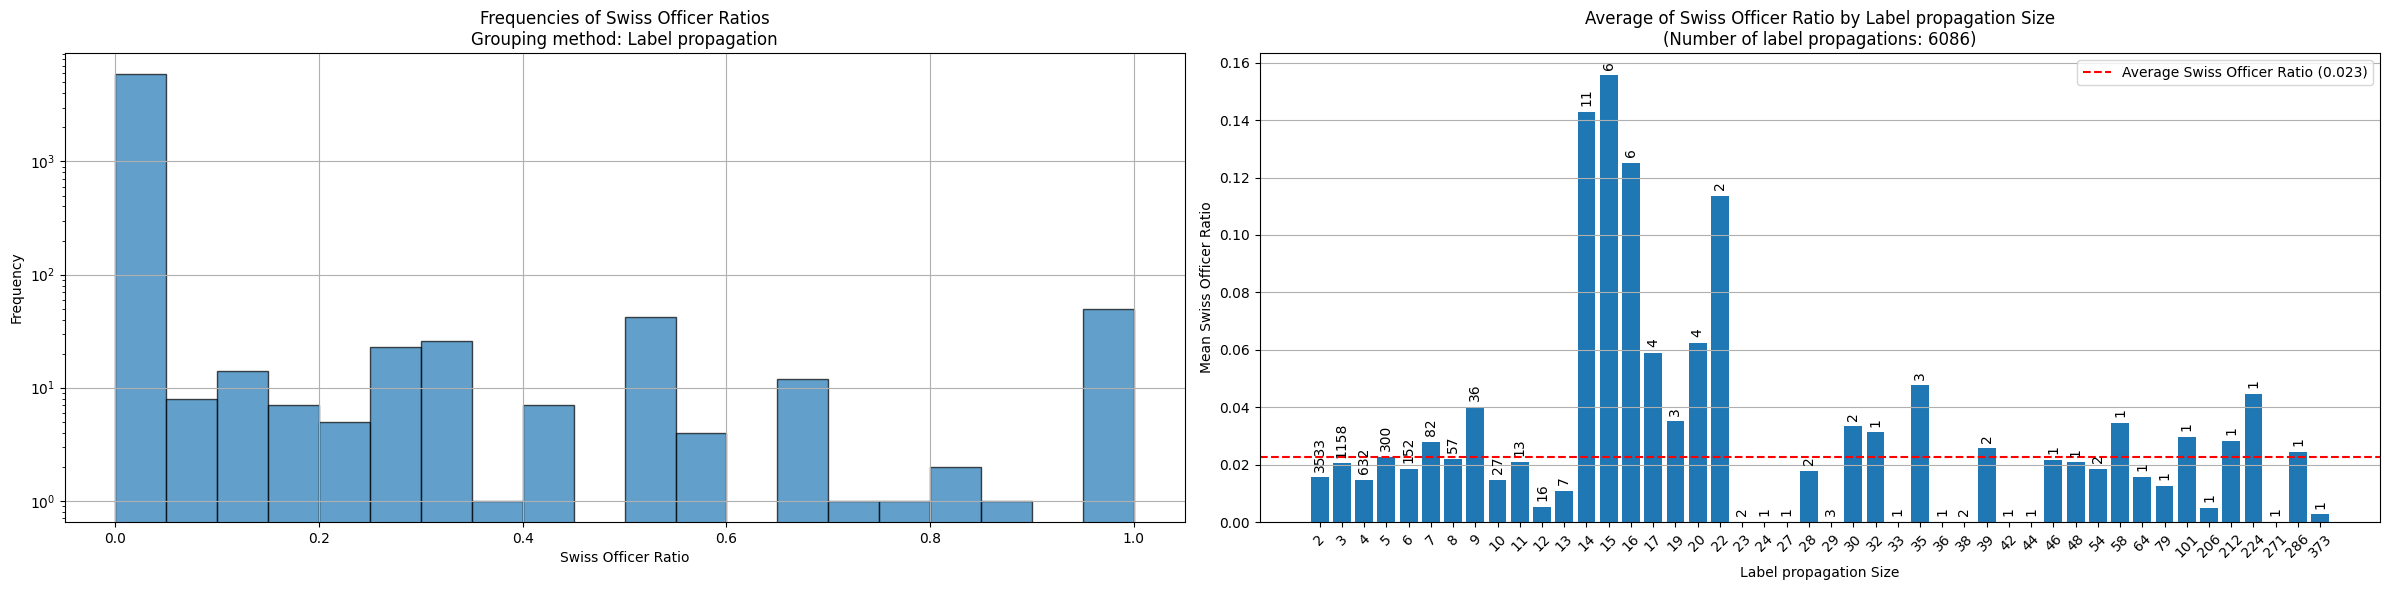

TODO Beschreiben, was man interpretieren kann

### Connected Components Analyse

In der linken Visualisierung sehen wir die Anzahl der Connected Components pro schweizer Officer Ratio und in der rechten Visualisierung sehen wir den durchschnittlichen schweizer Officer Ratio pro Connected Component Grösse.

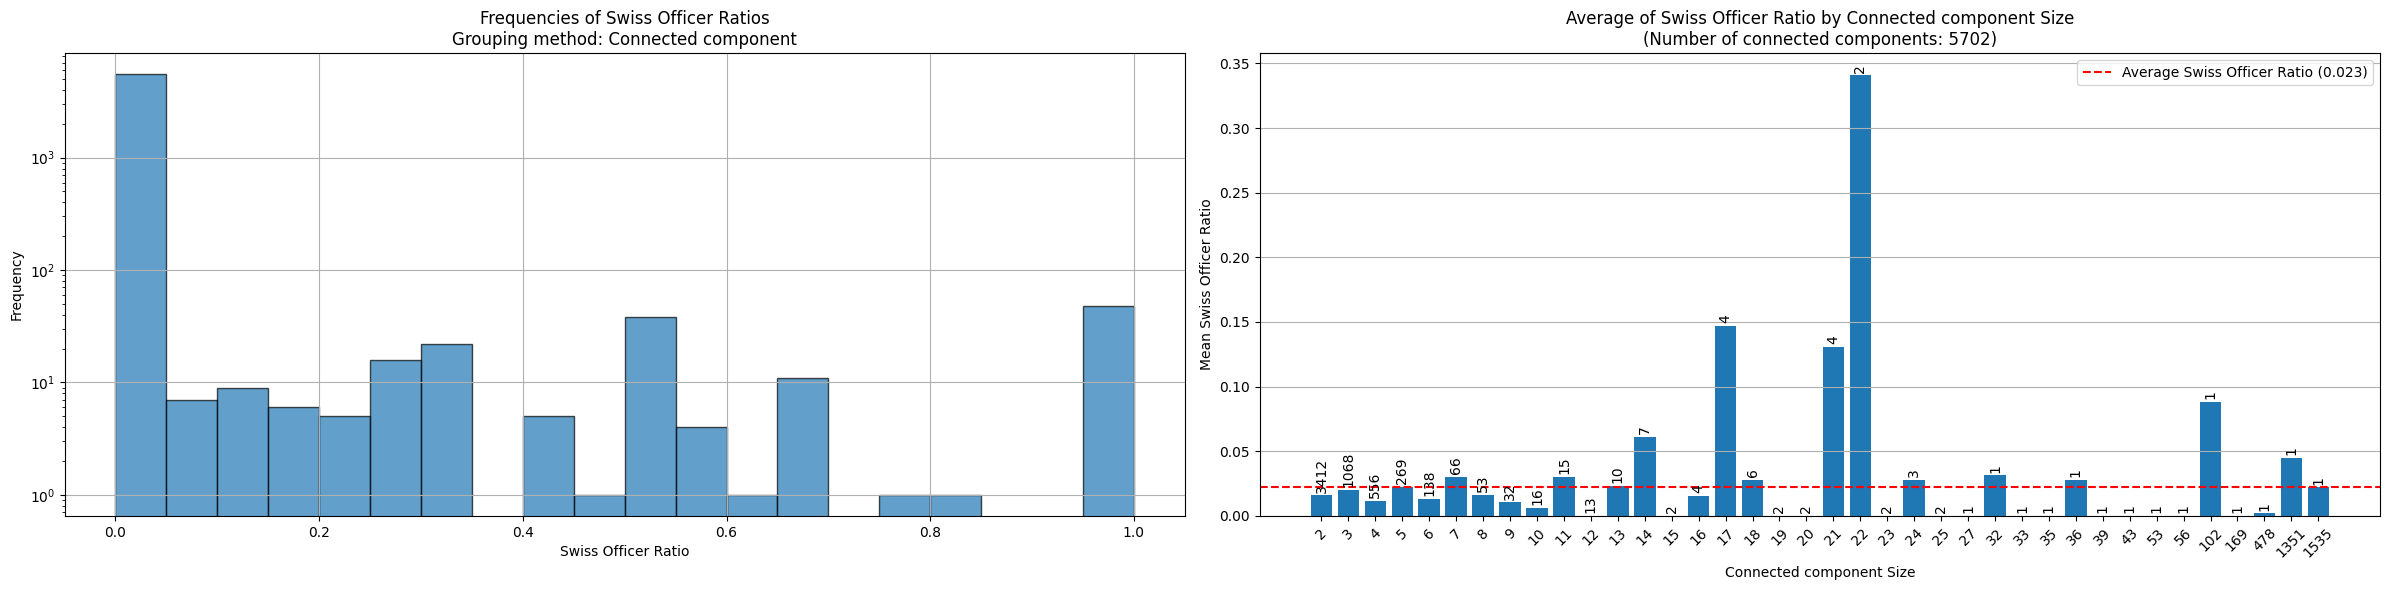

Das Verhältnis von schweizer Officers pro Connected Component ist in den meisten Fällen sehr tief. Es gibt einige Connected Component Grössen mit einem hohen Anteil an schweizer Officers, jedoch handelt es sich dabei sehr wahrscheinlich um Ausreisser, da es wenige solcher Gruppen gibt.

### Louvain Analyse

TODO Beschreiben, was man sieht und was Louvain ist

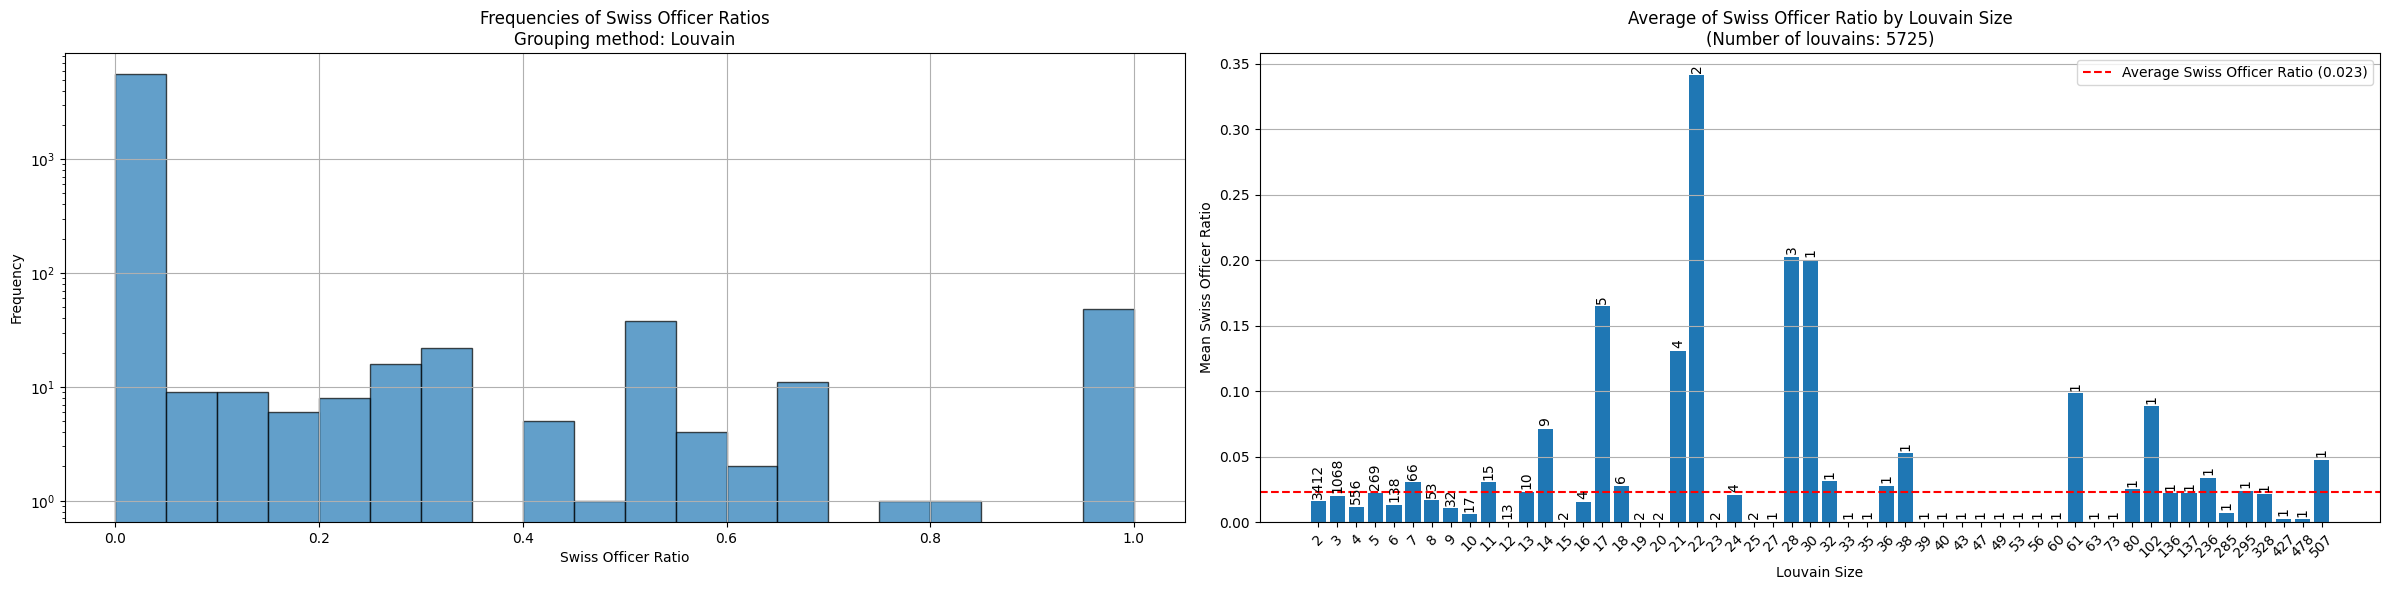

TODO Beschreiben, was man interpretieren kann

### Konklusion

Es wurde festgestellt, dass Schweizer Officers in den grösseren internationalen Netzwerken von Offshore-Unternehmen eine relativ geringe Rolle spielen. Die Homogenität der Nationalitäten innerhalb der grössten Cliquen und Gemeinschaften deutet darauf hin, dass diese Netzwerke bei einer sehr strengen Definition von Cliquen hauptsächlich von Beamten aus einem Land dominiert werden. Werden die Bedingungen jedoch gelockert, werden die Netze heterogener.

## Wie intensiv ist die Zusammenarbeit zwischen den Officers verschiedener Länder? Wie gut schneidet die Schweiz dabei ab?

Für diese Analyse werden alle Nodes ausser Officers und Entities herausgefiltert, Nodes mit ähnlichen Attributen gemerged und mit einer Newman's Weighted Projection auf die Officers projiziert. Danach werden alle Officers eines Landes zu einer Global View zusammengefasst wobei die Interaktionsstärke (Edge Weights) zwischen den Ländern aufaddiert wurde. Im finalen Graph gibt es keine Self-loops und jeweils nur eine Kante zwischen den Nodes, wessen Gewicht die Interaktionsstärke zwischen den Officern zweier Länder repräsentiert. 

### Interaktionsstärke zwischen den Ländern
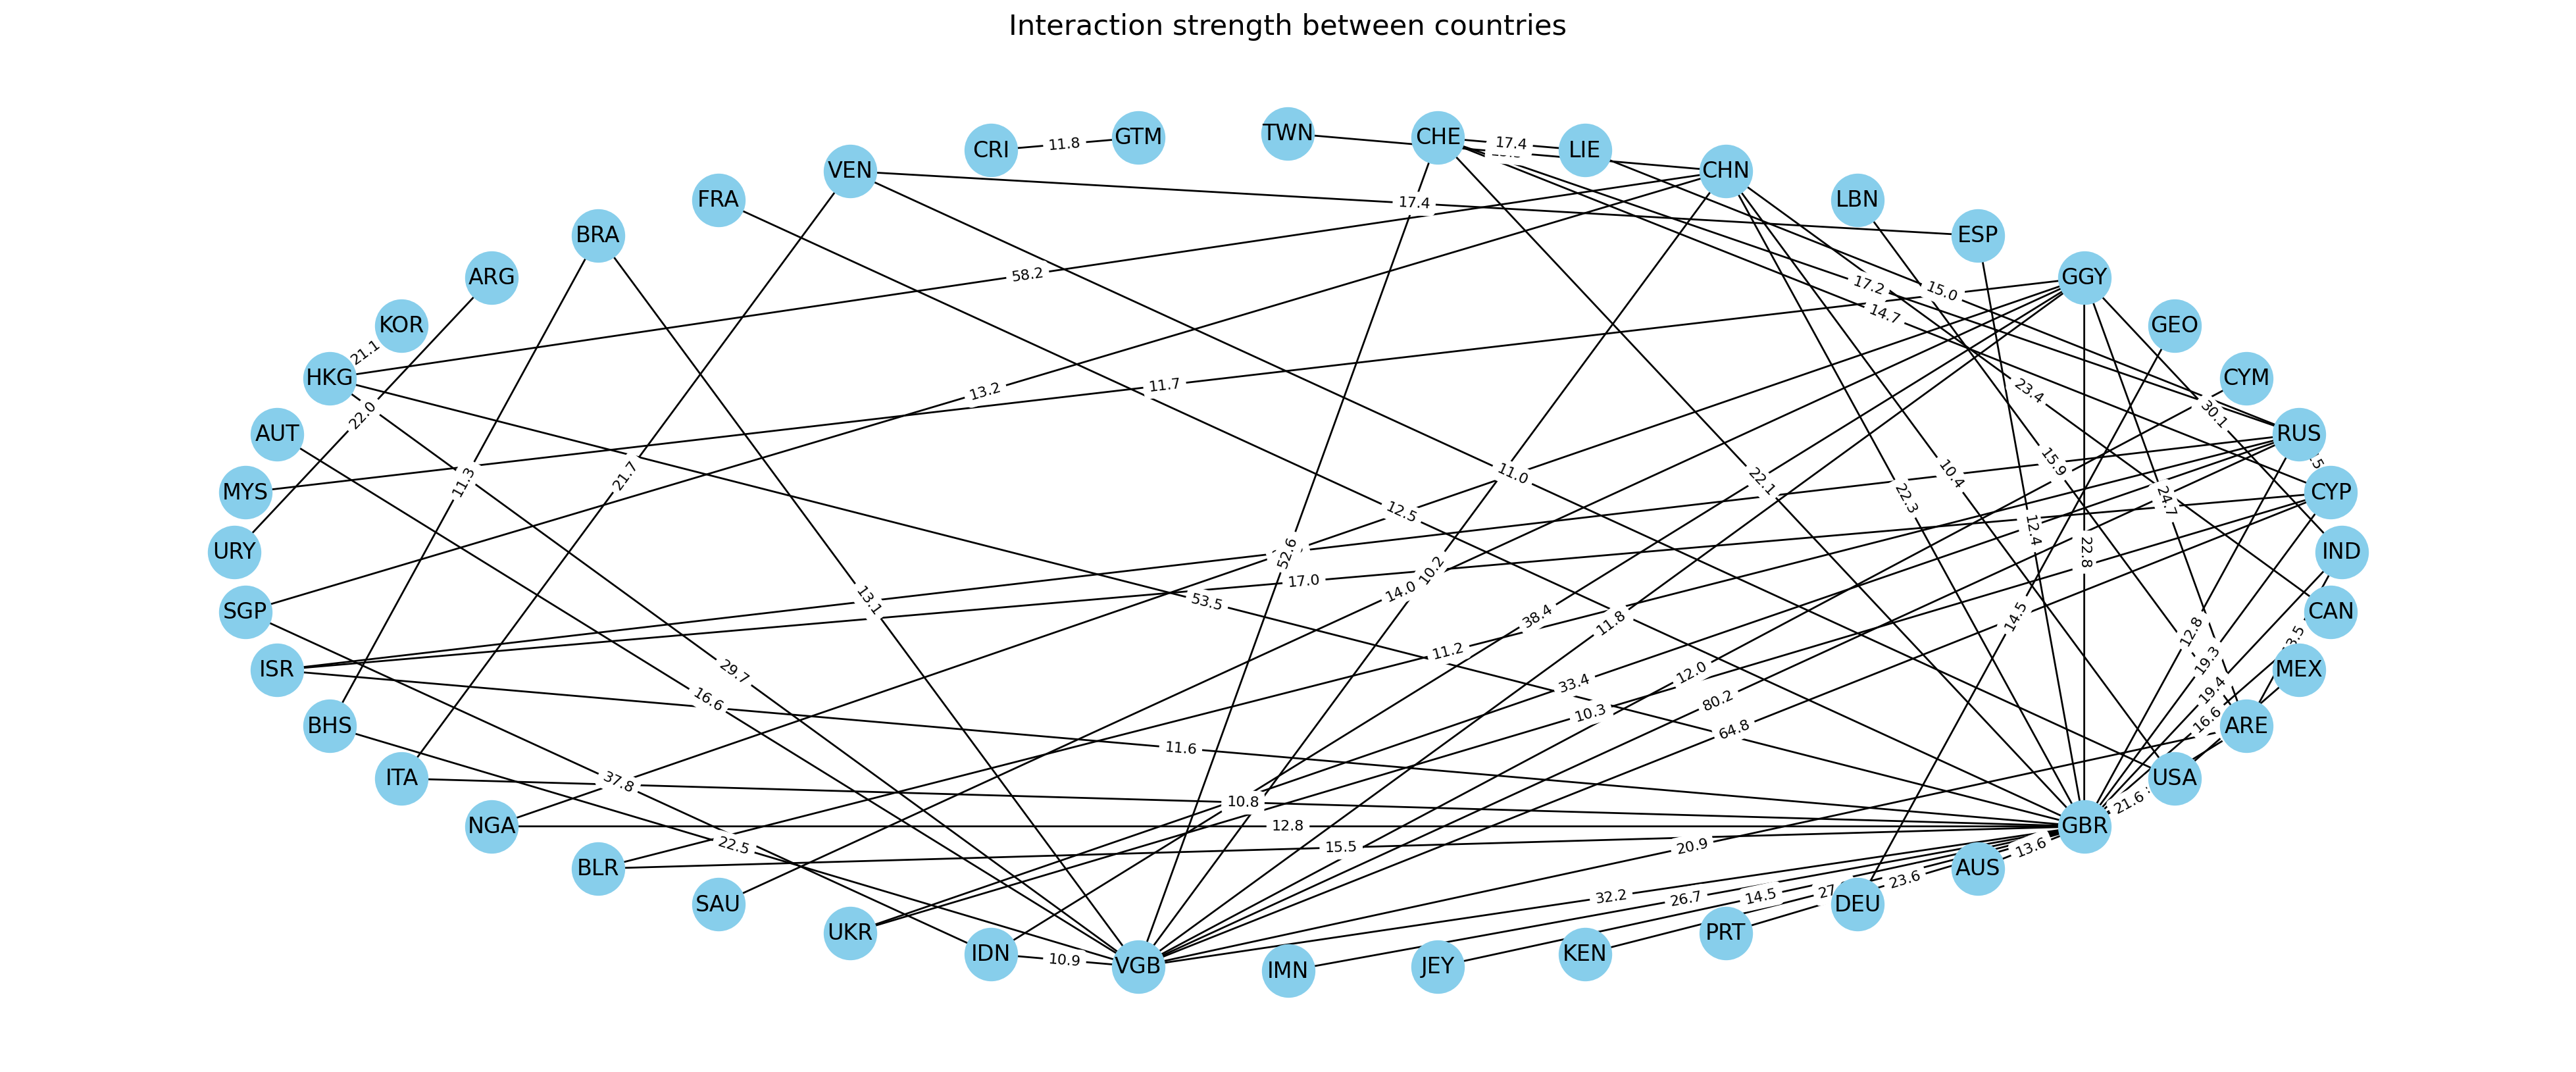

Visualisieren wir nun alle Nodes und Edges mit einem Edge Weight > 10, so ist gut ersichtlich, dass viele Verbindungen von England (GBR) aus gehen. Auch interessant sind Russlands Verbindungen mit der Ukraine, Belarus und Israel.  

Betrachten wir die Schweiz, so sind Verbindungen zwischen den Vereinigten Arabischen Emiraten, Zypern, Virgin Islands (British), Litauen und Russland ersichtlich.  
Nachfolgend wird die totale Interaktionsstärke eines Landes mit dem Ausland der Grösse nach sortiert dargestellt (einfach gesagt die Summe der Edge-Weights im obigen Plot).

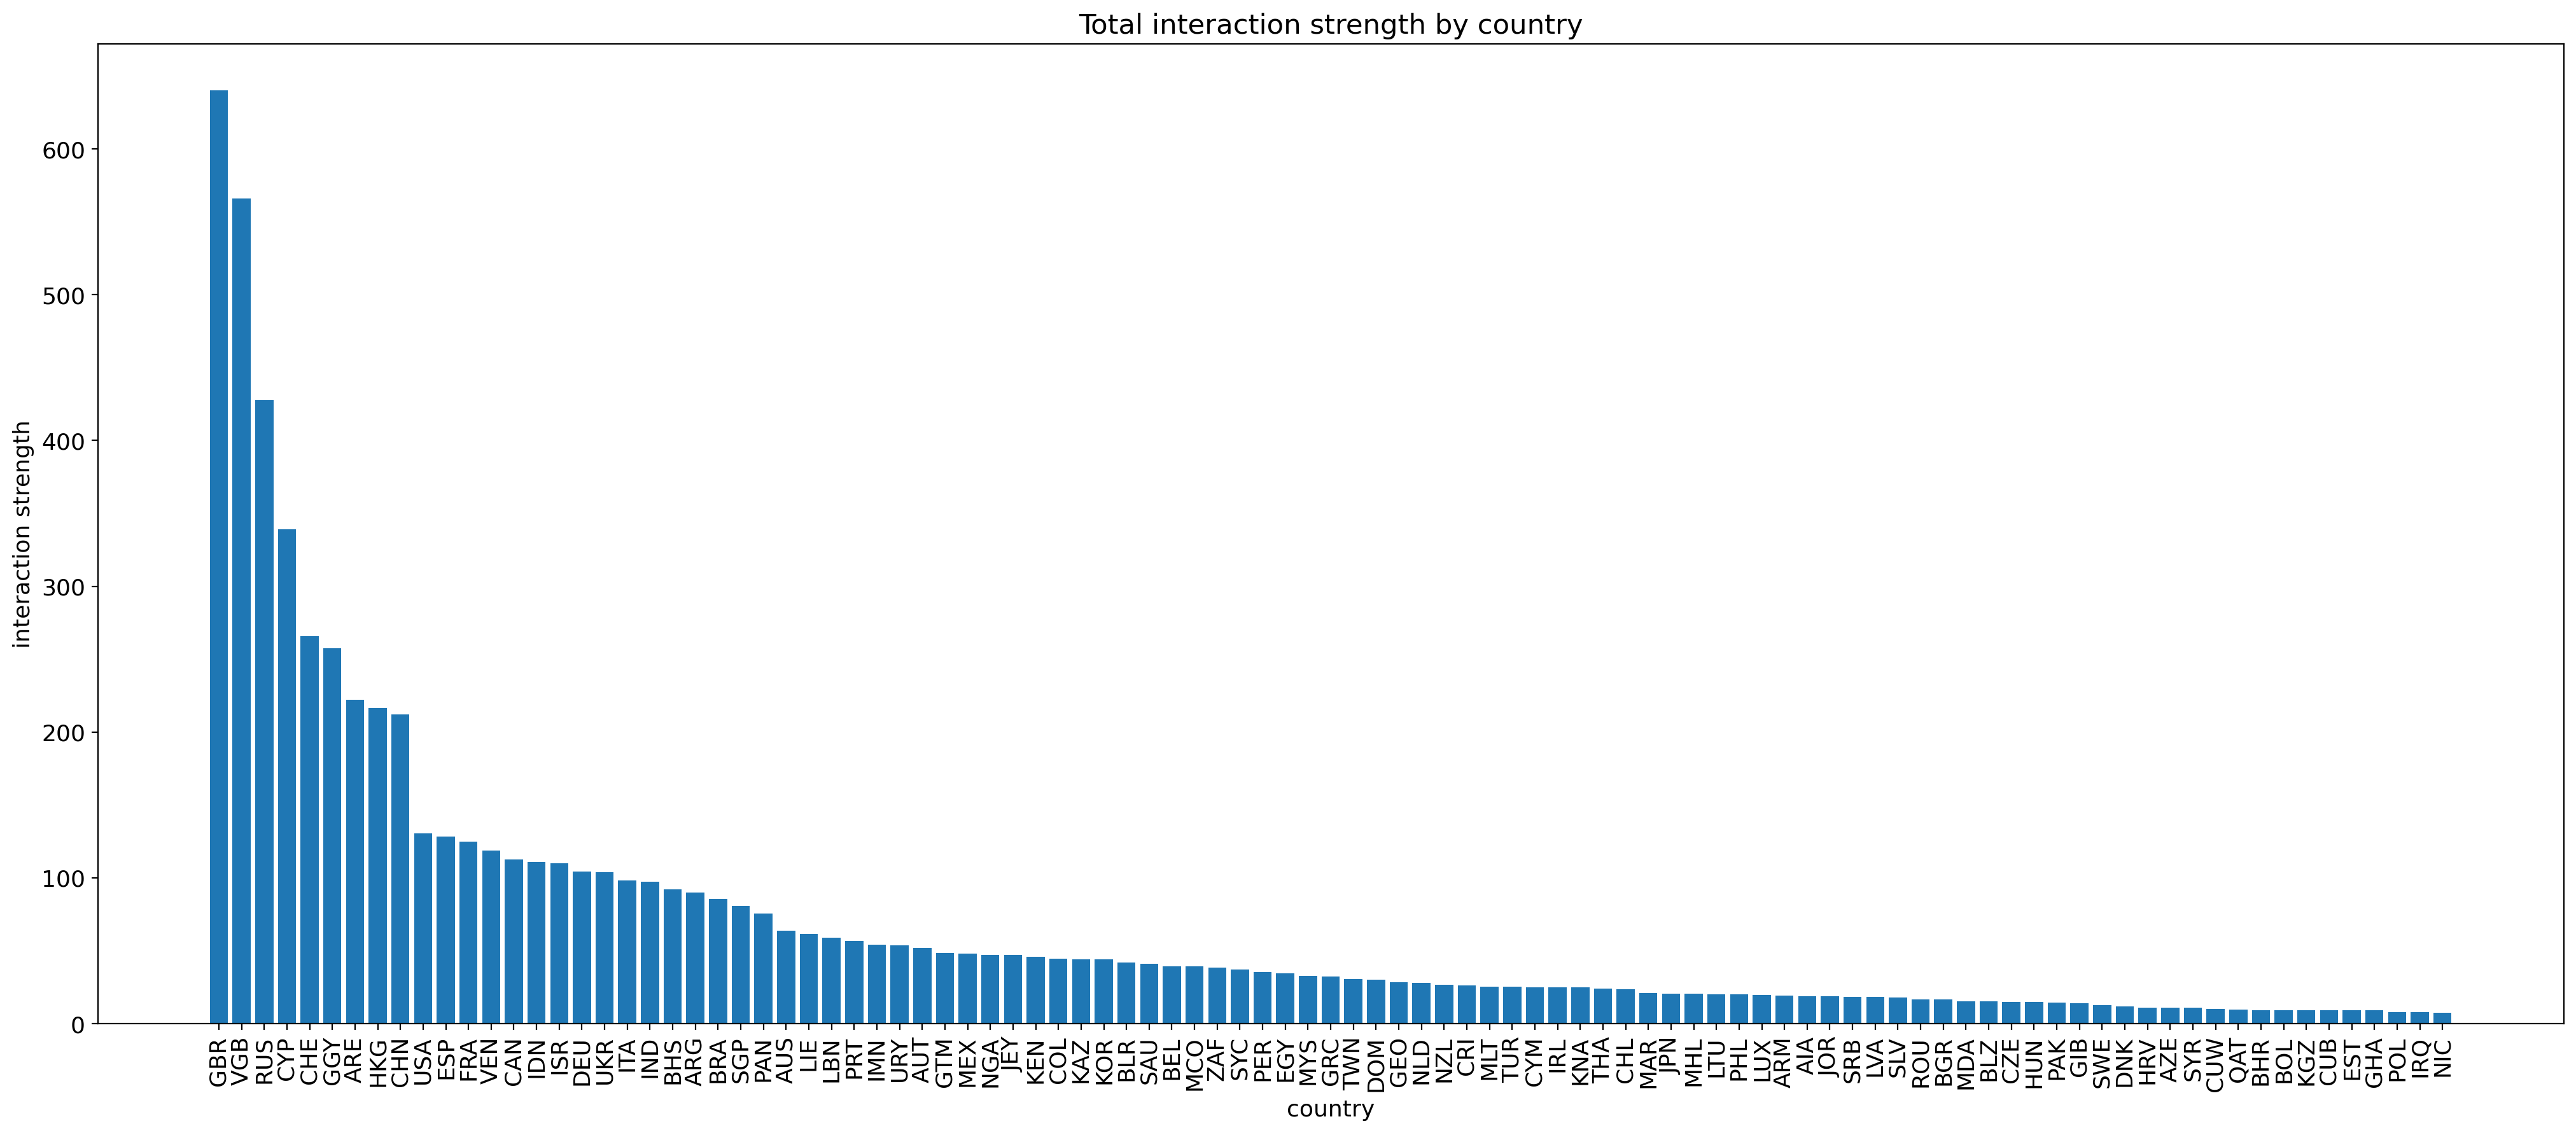

Im oberen Plot dargestellt ist die totale Interaktionsstärke (Summe aller Edge-Weights) der Officers der einzelnen Länder.  
Wie gut zu erkennen ist, befindet sich die Schweiz auf dem auf dem fünften Platz (Rang = 5).  

In den nachfolgenden Hypothesentests wird überprüft ob die Interaktionsstärke der Schweiz statistisch signifikant ist, oder ob die Schweiz nur zufällig so gut abschneitet.

### Hypothesentest

Um zu bestimmen ob die Interaktionsstärke der Schweiz mit den anderen Ländern statistisch signifikant ist, führen wir einen Hypothesentest durch:

- Im Hypothesentest wird überprüft, ob der Rang der Schweiz bezüglich Interaktionsstärke mit den anderen Ländern statistisch signifikant ist (Irrtumswahrscheinlichkeit = 5%).
- Auch die Interaktionsstärke selbst wird auf statistische Signifikanz überprüft.

Der Hypothesentest wird durch einen Permutationstest durchgeführt.  
Die gesamte Interaktionsstärke mit dem Ausland wird durch den Weighted Node Degree berechnet (Summe aller Edge-Weights einer Node).  
Anschliessend werden die Kantengewiche des Netzwerks zufällig vertauscht und die Interaktionsstärke und Rang der Schweiz neu berechnet.
Diese Permutation wird 20'000 mal durchgeführt um die Verteilung der Interaktuonsstärke zu simulieren.

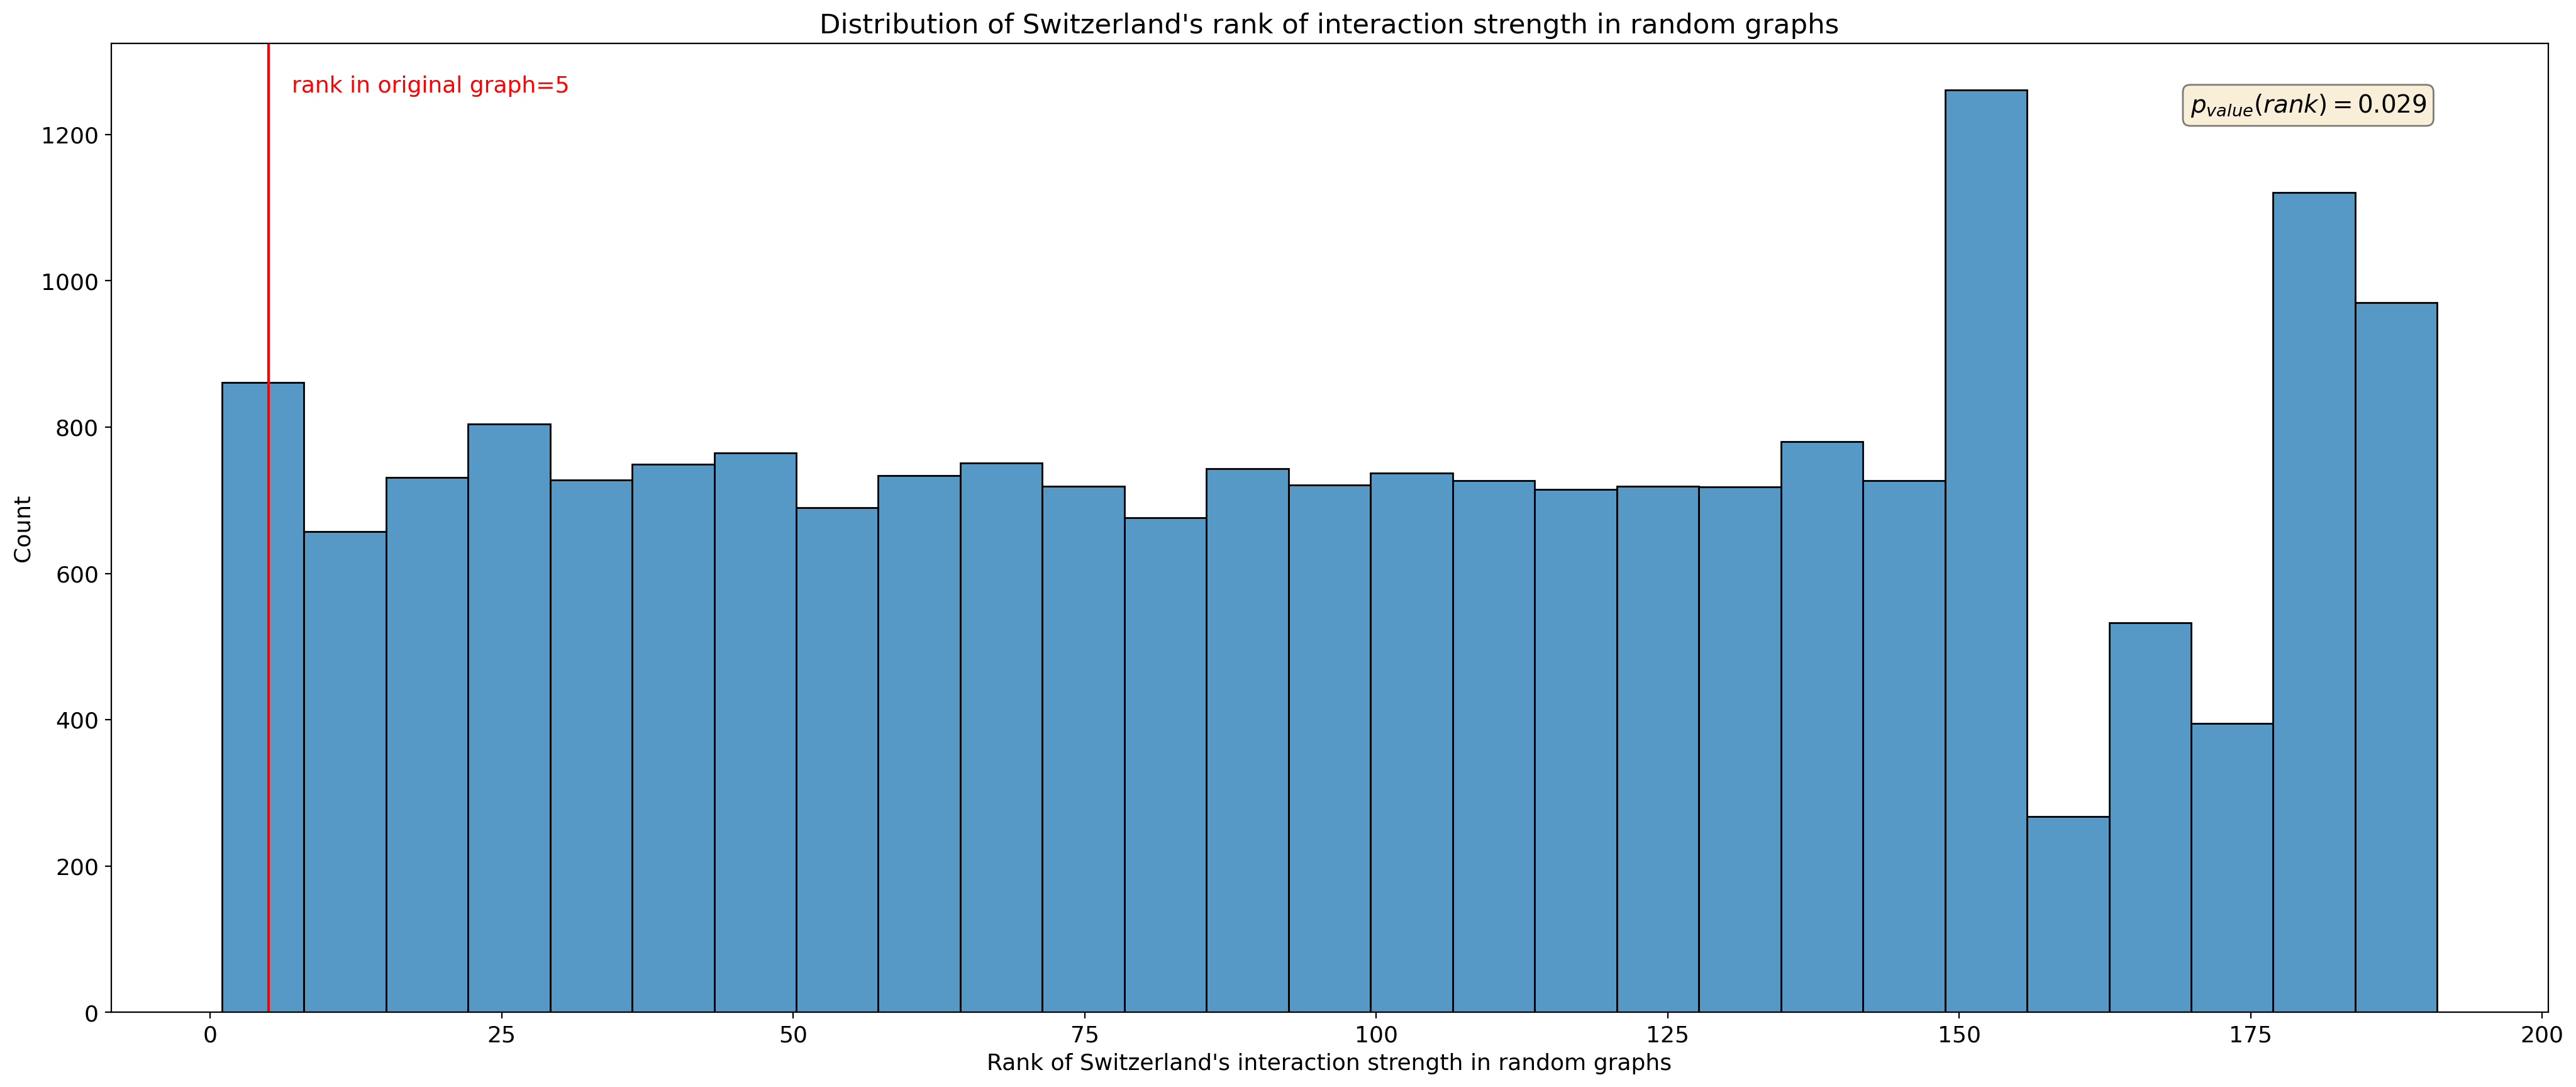

Im obigen Plot sind die Ränge der Interaktionsstärke der Schweiz in zufälligen Graphen als Histogramm visualisiert. Die zufälligen Graphen wurden durch einen Permutationstest mit 20.000 Durchläufen erstellt. Nach jedem Durchlauf wurde der Rang der Schweiz neu berechnet. Dadurch kann der Rang der Schweiz in zufälligen Graphen simuliert werden und herausgefunden werden, in wie vielen Fällen der zufällige Rang kleiner oder gleich dem Rang im ursprünglichen Graphen ist. Dieses Histogramm zeigt die Verteilung des Ranges der Schweiz in zufälligen Graphen. Die rote Linie repräsentiert den Rang im ursprünglichen Graphen. Je weniger blaue Fläche sich links von der Linie befindet, desto kleiner ist der p-Wert und somit auch die Irrtumswahrscheinlichkeit.

Mit einem p-Wert von weniger als 0,05 ist der ursprüngliche Rang von 5 statistisch signifikant.  
Das P-value zeigt, dass $H_0$ abgelehnt und $H_1$ angenommen werden kann.

$$
\begin{align*}
H_0 &: r \geq r_{\text{zufällig}} \\
H_1 &: r < r_{\text{zufällig}}
\end{align*}
$$

Somit kann behaupten werden, dass die Schweiz zu den Spitzenreitern bezüglich der Interaktionsstärke mit anderen Ländern gehört.

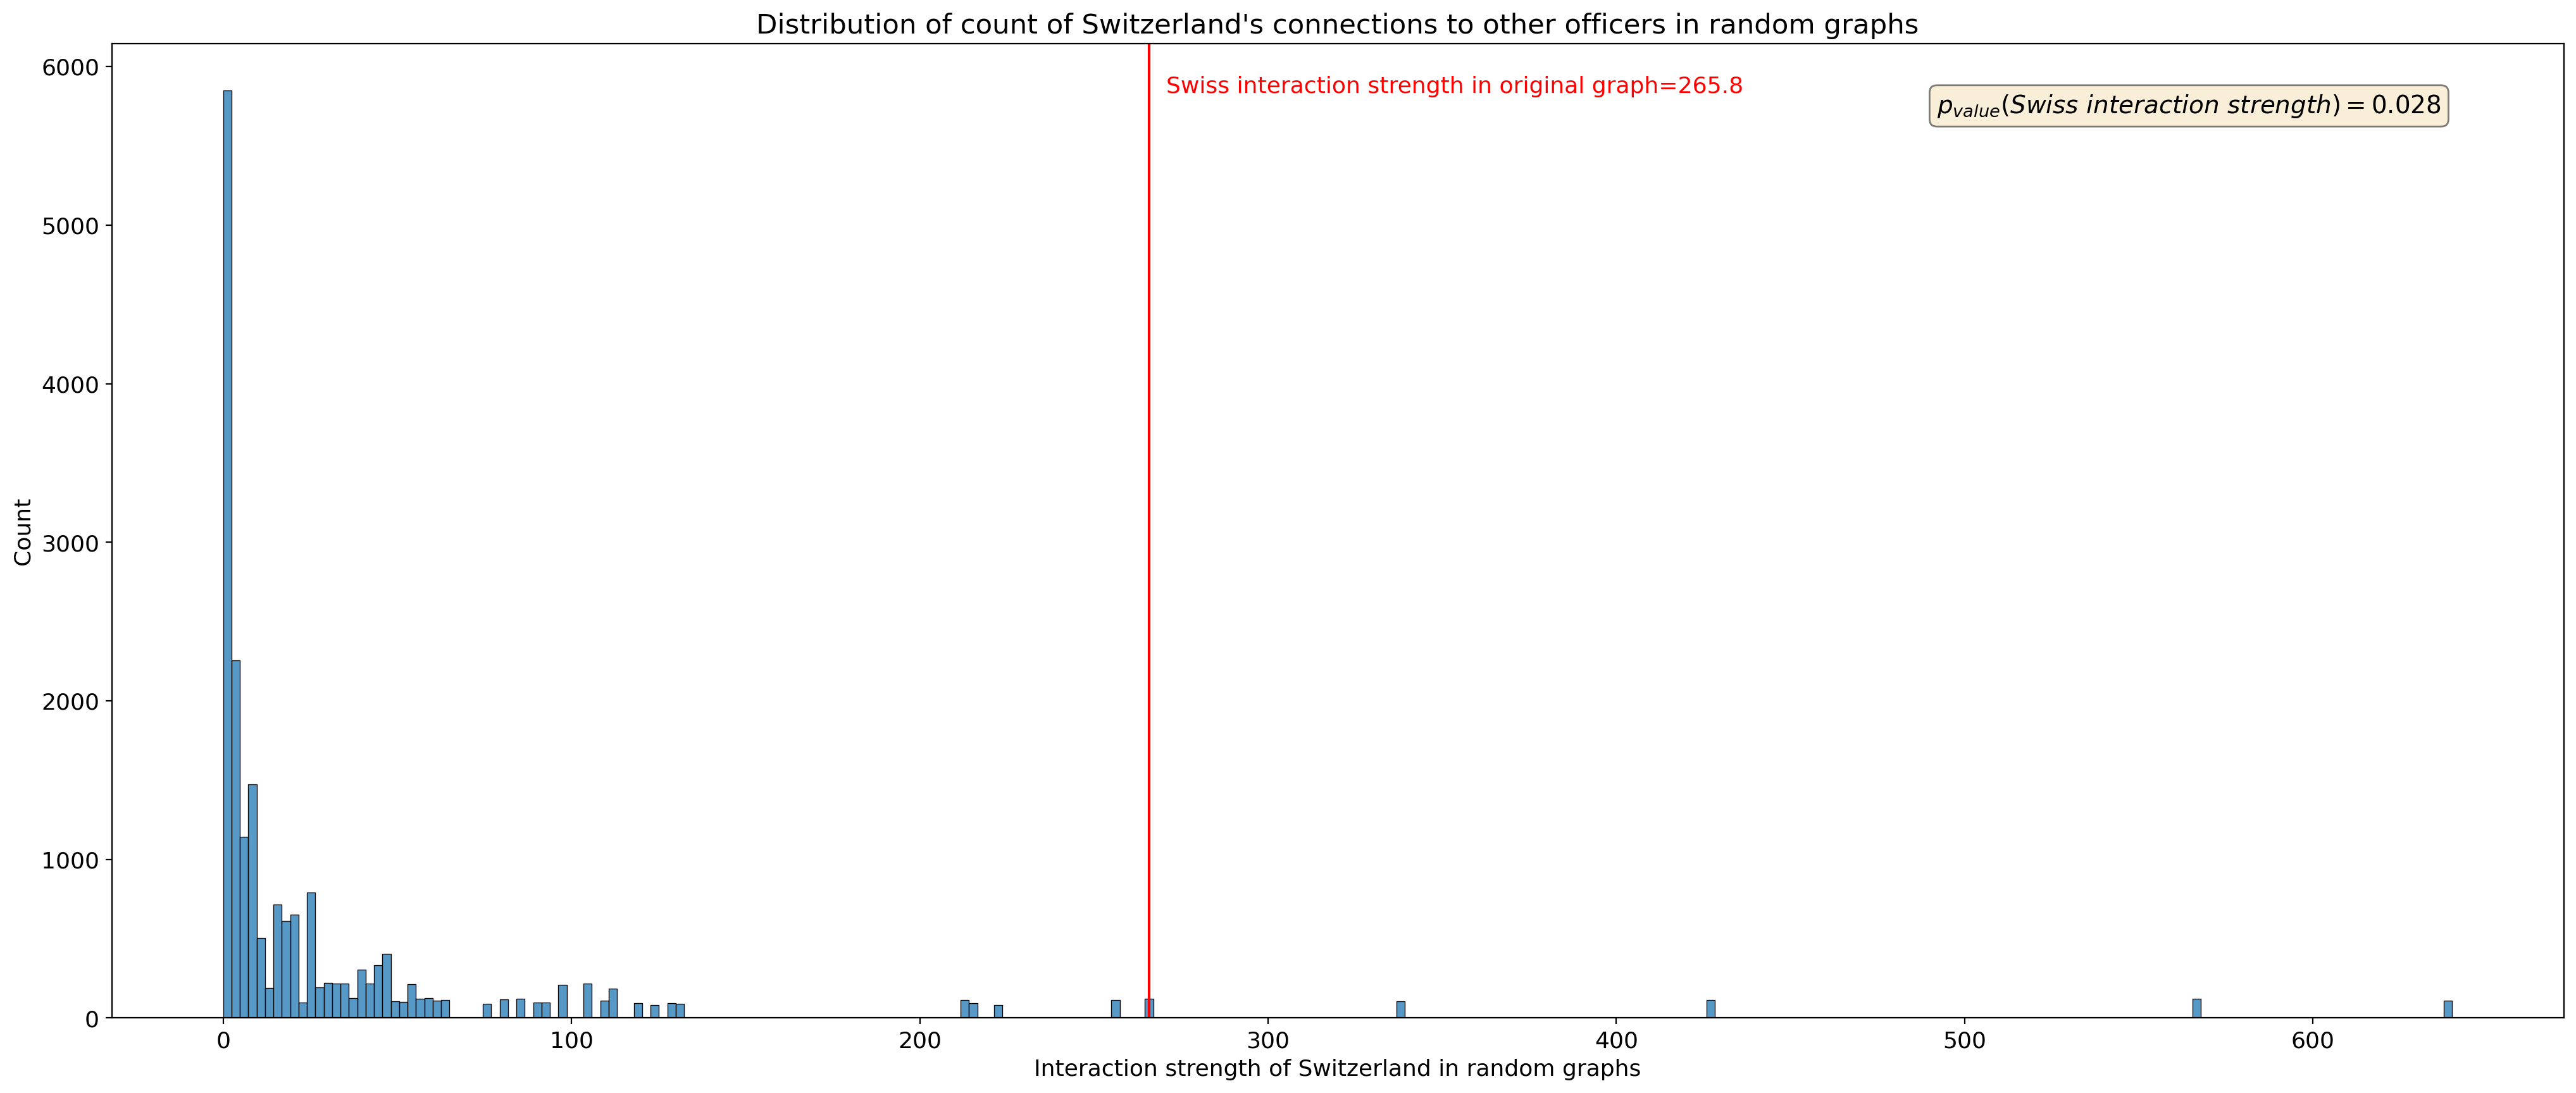

Im obigen Plot ist die Verteilung der Interaktionsstärke (Edge Weight) der Schweiz in zufälligen Graphen als Histogramm dargestellt. Diese zufälligen Graphen wurden ebenfalls durch einen Permutationstest mit 20.000 Durchläufen erstellt. Die rote Linie repräsentiert die Interaktionsstärke der Schweiz im ursprünglichen Graphen. Je weniger blaue Fläche sich rechts von der roten Linie befindet, desto besser, da dies einen kleineren p-Wert und somit eine geringere Irrtumswahrscheinlichkeit bedeutet.

Bei Betrachtung des P-value ist auch die Interaction Strength selbst statistisch signifikant.  
$H_0$ kann abgelehnt und $H_1$ angenommen werden.

$$
\begin{align*}
H_0 &: \text{Interaktionsstärke} \leq \text{Interaktionsstärke}_{\text{zufällig}} \\
H_1 &: \text{Interaktionsstärke} > \text{Interaktionsstärke}_{\text{zufällig}}
\end{align*}
$$

## Welche Schweizer Officers haben die meisten Offshore Firmen? 
Für diese Analyse nehmen wir wieder den Subgraphen mit den Connected Components, welche mindestens eine Schweizer Adresse beinhalten. Wir mergen auch Nodes, welche identische Attribute beinhalten und suchen die Officers, mit der höchsten Anzahl Verbindungen an Offshore Firmen (Entity Out-Degree).

### Ruslan Goryukhin Ego Graph

Ruslan Goryukhin hat ein Entity Out-Degree von 28. Er hat somit Verbindungen zu den meisten Offshore Firmen. Er ist vorallem bei vielen Offshore Firmen als "Ultimate Beneficial Owner" eingetragen. Ruslan Goryukhin ist ein russischer Unternehmer, welcher zum Zeitpunkt der Pandora Papers Leaks in der Schweiz wohnhaft war. Nach folgender [Quelle](https://www.reporter.lu/pandora-papers-russische-versteckspiele-via-luxemburg/) ist er "[...] ein enger Geschäftspartner von Arkadij Rotenberg, der wiederum ein Vertrauter von Wladimir Putin ist". Falls er noch in der Schweiz wohnhaft ist, könnte dies für die Schweizer Behörden von Interesse sein, vorallem wegen den aktuellen Sanktionen gegen Russland wegen des Ukraine-Konflikts.

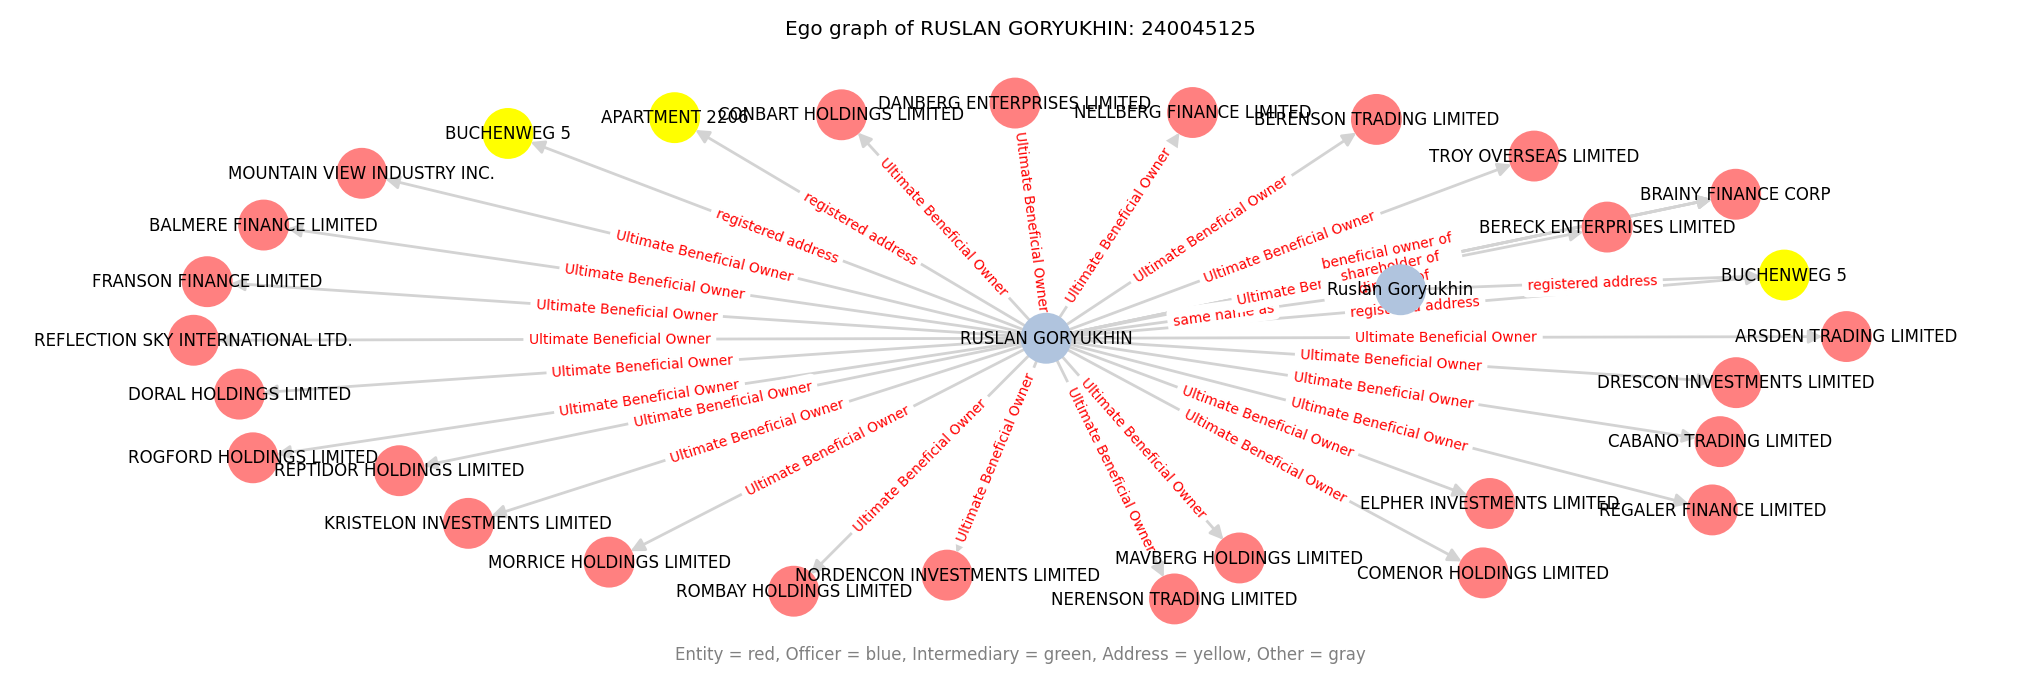

### Adrian Guldener Ego Graph

Adrian Guldener hat einen Entity Out-Degree von 27, nicht weit von Goryukhins 28 entfernt. Adrian Guldener ist ein Schweizer Staatsbürger, wohnhaft in Zug. Er ist bei weniger Entitäten beteiligt, jedoch hat er mehr Verbindungen zu diesen Entitäten. Er ist vorallem bei vielen Offshore Firmen als "Shareholder" und "Beneficial Owner" eingetragen. Adrian Guldener ist CEO der Wealth Management Firma [Marcuard Heritage](https://marcuardheritage.com/who-we-are/board-of-directors/) und war von [2001 bis 2003 Executive Director of UBS Private Banking Eastern Europe in Zürich.](https://marcuardheritage.com/app/uploads/2020/07/MH_Kurz-CV_Adrian.pdf)

Nach einer Google Suche scheint es so, als wäre Adrian Guldener nicht in konkrete Skandale verwickelt.

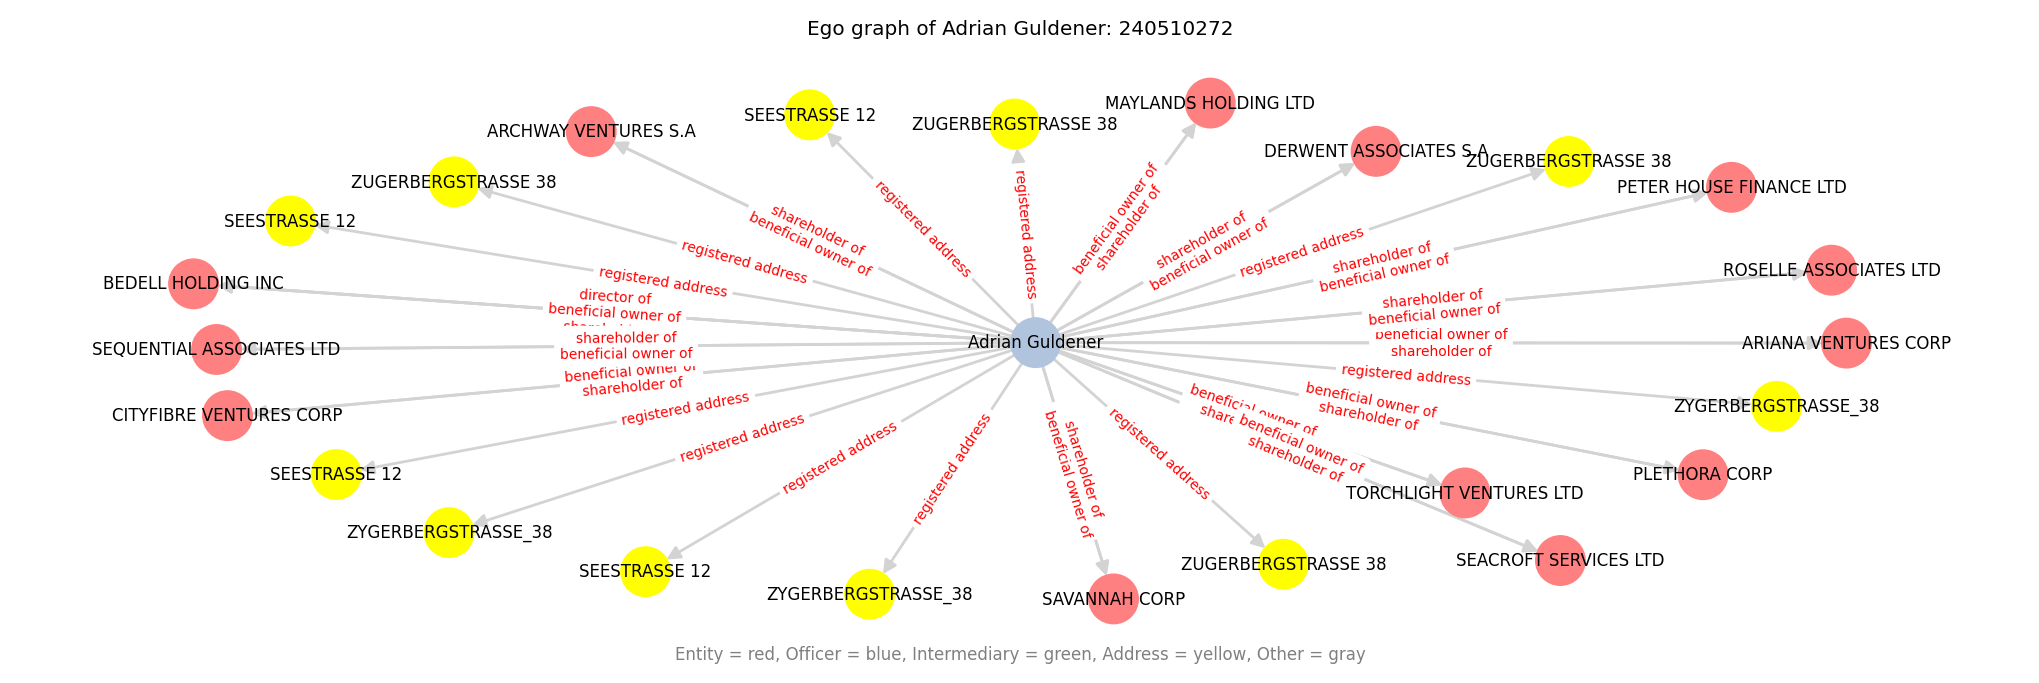

### Alexander Studhalter Ego Graph

Alexander Studhalter hat einen Entity Out-Degree von 15. Alexander Studhalter ist ein Anwalt und Notar aus Zug. Er ist vorallem bei vielen Offshore Firmen als "beneficial owner" eingetragen. [Sein Unternehmen "Studhalter International Group AG" handelt nach einigen Angaben rund 1,5 Mrd. CHF an Assets.](https://www.forbes.at/artikel/neue-moeglichkeiten.html) [Er wurde 2022 von der USA saktioniert, weil er mit der Tochter eines bereits sanktionierten Oligrachen gehandelt hat.](https://www.handelsblatt.com/unternehmen/mittelstand/familienunternehmer/alexander-studhalter-usa-setzen-erstmals-schweizer-staatsbuerger-auf-die-sanktionsliste/28810944.html)

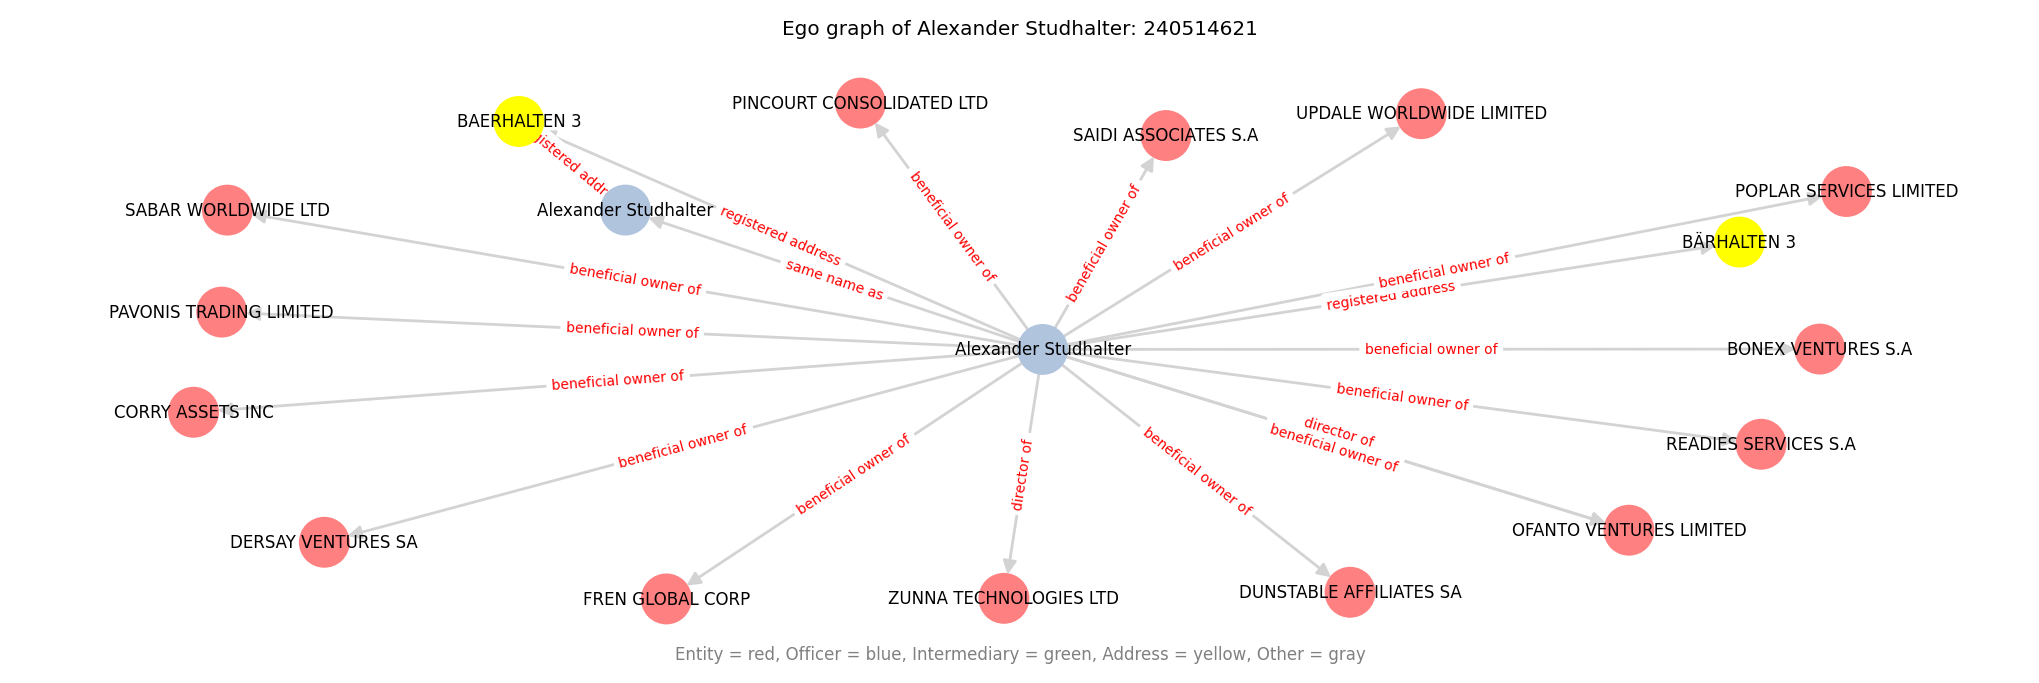

## Haben schweizer Officer mehr Firmen zusammen mit anderen schweizer Officers oder mit ausländischen Officers?

Für diese Analyse werden alle Nodes ausser Officers und Entities herausgefiltert, Nodes mit ähnlichen Attributen gemerged und mit einer einfachen Transformation auf die Officers projiziert (Officer-Officer Graph).  
Wenn zwei Officers also mindestens einmal zusammen im Vorstand einer Firma sassen, so besitzen diese im projected Graph (Officer-Officer Graph) eine Verbindung.

In einem ersten Schritt wird überprüft, ob Officers vom gleichen Land eher im Vorstand einer Firma sitzen oder nicht.  
Dazu wird die Pearson Korrelation als Metrik verwendet.

### Korrelation zwischen den Officerbeziehungen und Ländern

Um einen Hypothesentest auf der Korrelation zwischen Landeszugehörigkeit und Interaktion zwischen den Officers durchzuführen, wird ein weiterer Graph mit den Officer Nodes erstellt.  
Bei diesem besitzen die Officer Nodes nur dann eine Edge, wenn sie Teil vom gleichem Land sind (Same Country Graph).

Diese zwei Graphen werden dann für einen Dyadischen Hypothesentest verwendet, ob die Pearson Korrelation zwischen dem Officer-Officer Graph und dem Same Country Graph statistisch signifikant ist, wobei wir uns auf eine Irrtumswahrscheinlichkeit von 5% beziehen.

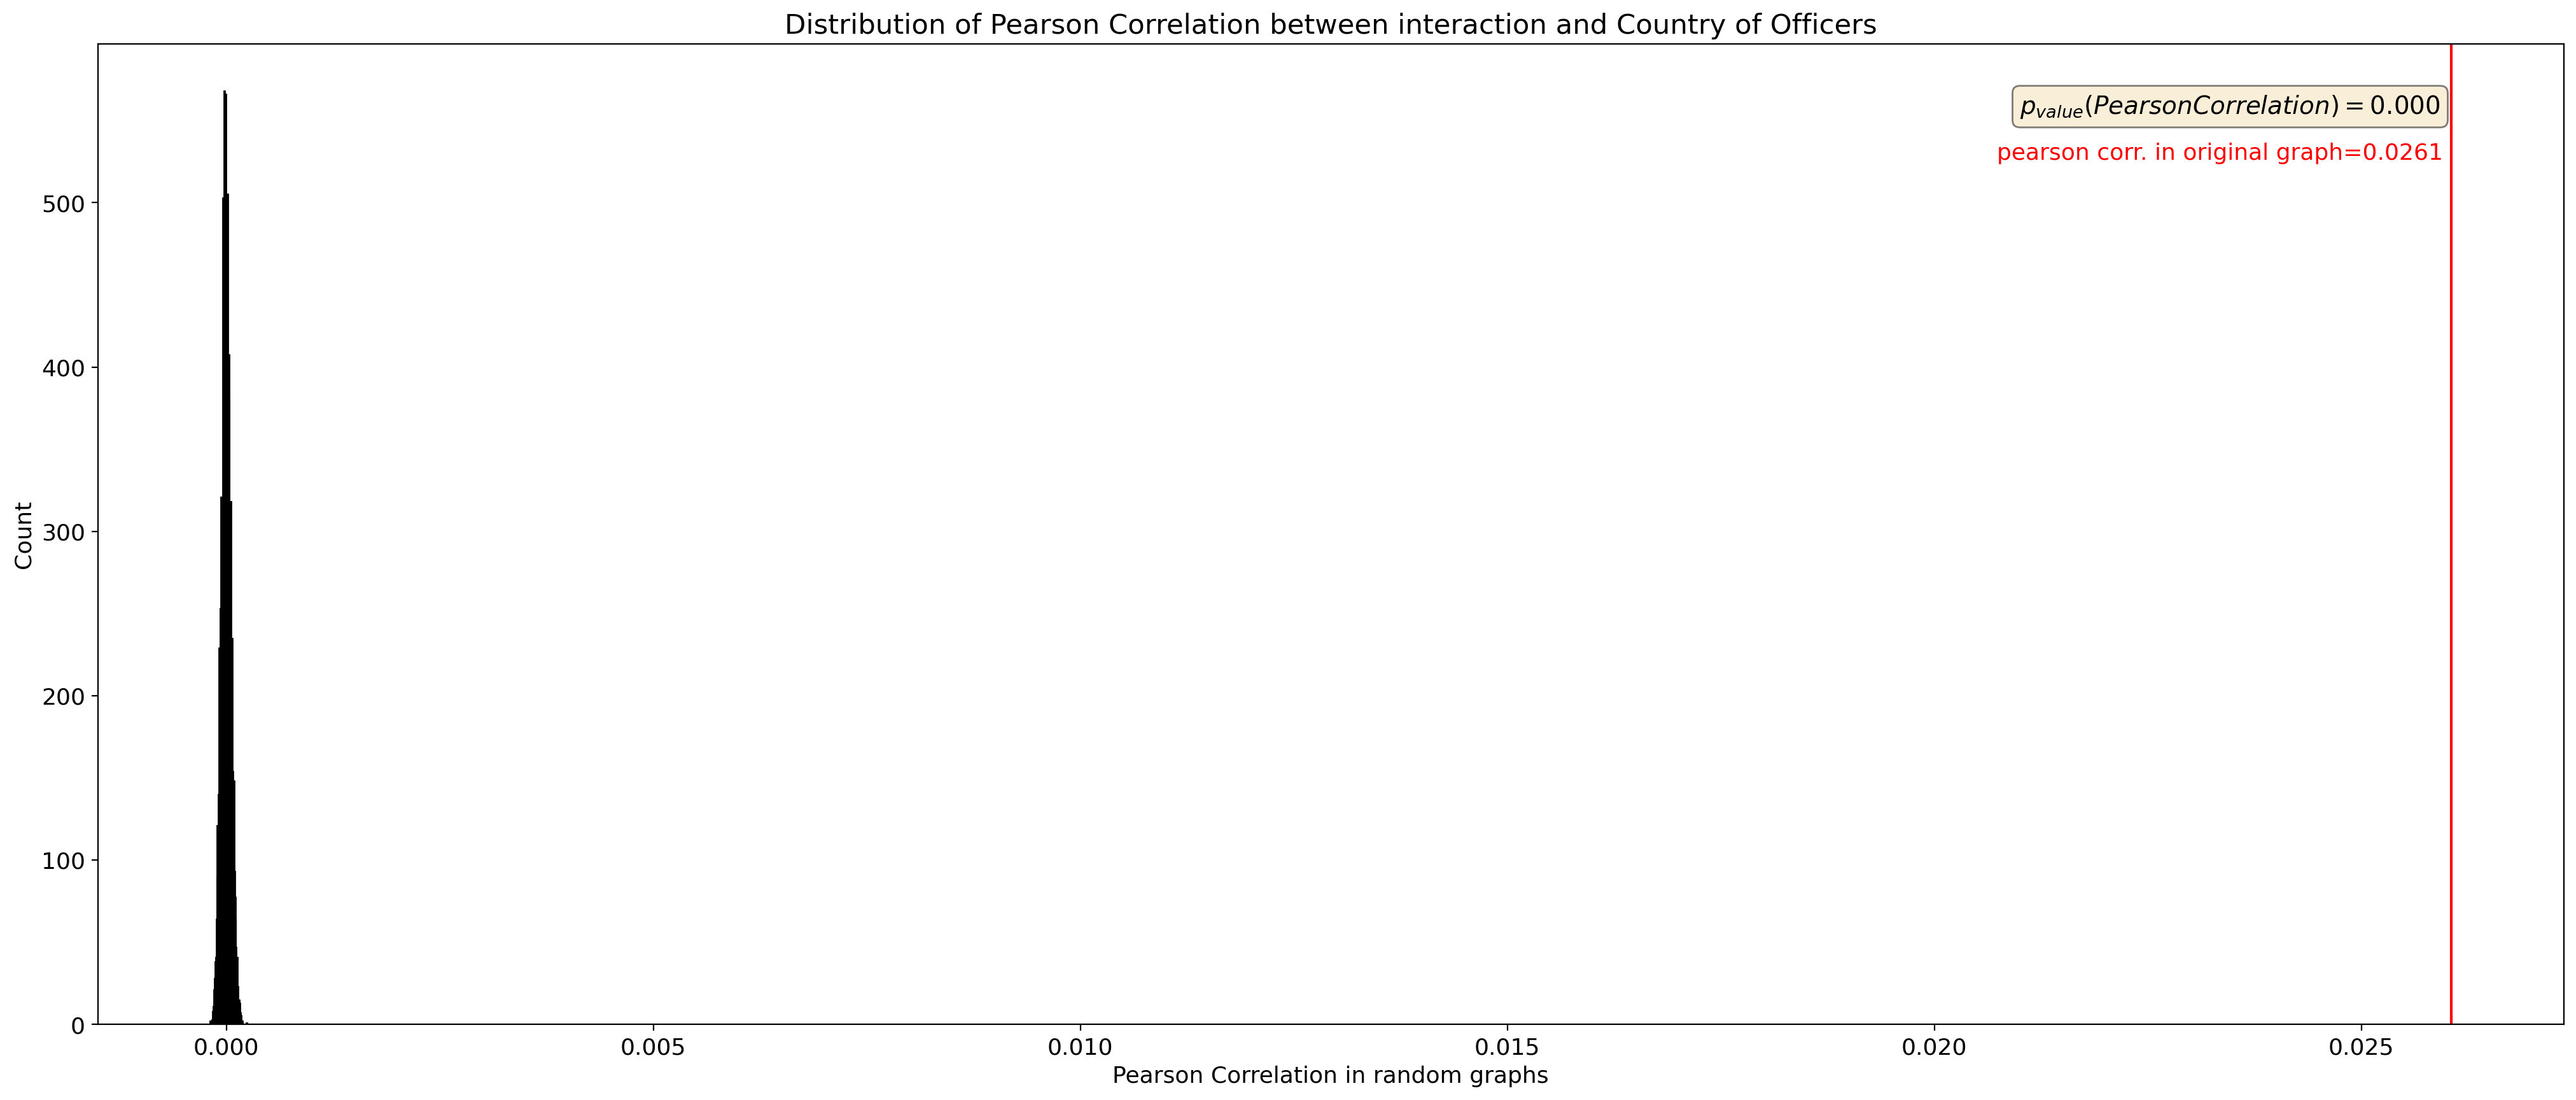

Im obigen Plot ist die Verteilung der Pearson Korrelation zwischen Interaktion und der Landeszugehörigkeit der Officers in zufälligen Graphen als Histogramm dargestellt. Diese zufälligen Graphen wurden durch einen Permutationstest mit 10.000 Durchläufen erstellt. Die rote Linie repräsentiert die Pearson Korrelation im ursprünglichen Graphen. Es ist deutlich zu sehen, dass sich die zufälligen Korrelationen viel weiter links von der Original-korrelation befindet.  
Auch das P-value von 0.000 zeigt, dass es sich dabei um eine signifikante Korrelation handlet.  

Allerdings ist die Korrelation relativ schwach, weshalb nicht von einem grossen Zusammenhang zwischen Interaktion und Landeszugehörigkeit gesprochen werden kann.

$$
\begin{align*}
H_0 &: \text{Officer\ Interaktion} \leq \text{Officer\ Interaktion}_{\text{zufällig}} \\
H_1 &: \text{Officer\ Interaktion} > \text{Officer\ Interaktion}_{\text{zufällig}}
\end{align*}
$$

Das P-value zeigt, dass $H_0$ abgelehnt und $H_1$ angenommen werden kann.

### Haben schweizer Officers mehr Verbindungen innerhalb der Schweiz?

In diesem Hypothesentest wird das Verhältnis zwischen den Interaktionen schweizer Officers mit anderen schweizer Officers (Interaktion = Beide Officers sitzen im gleichen Vorstand einer Firma) und der totalen Anzahl Interaktionen schweizer Officers zu anderen Officers als Zielmetrik verwendet.  

Diese soll Aufzeigen, wieviel Prozent der Interaktionen innerhalb der Schweiz bleiben und wieviele ins Ausland gehen.
Hier wird auch eine Irrtumswahrscheinlichkeit von 5% festgelegt.

Dafür wird eine Global View aus dem Officer-Officer-Graphen erstellt, bei welchen alle Nodes des gleichen Landes in eine Node gemerged werden und Selfloops beibehalten werden.

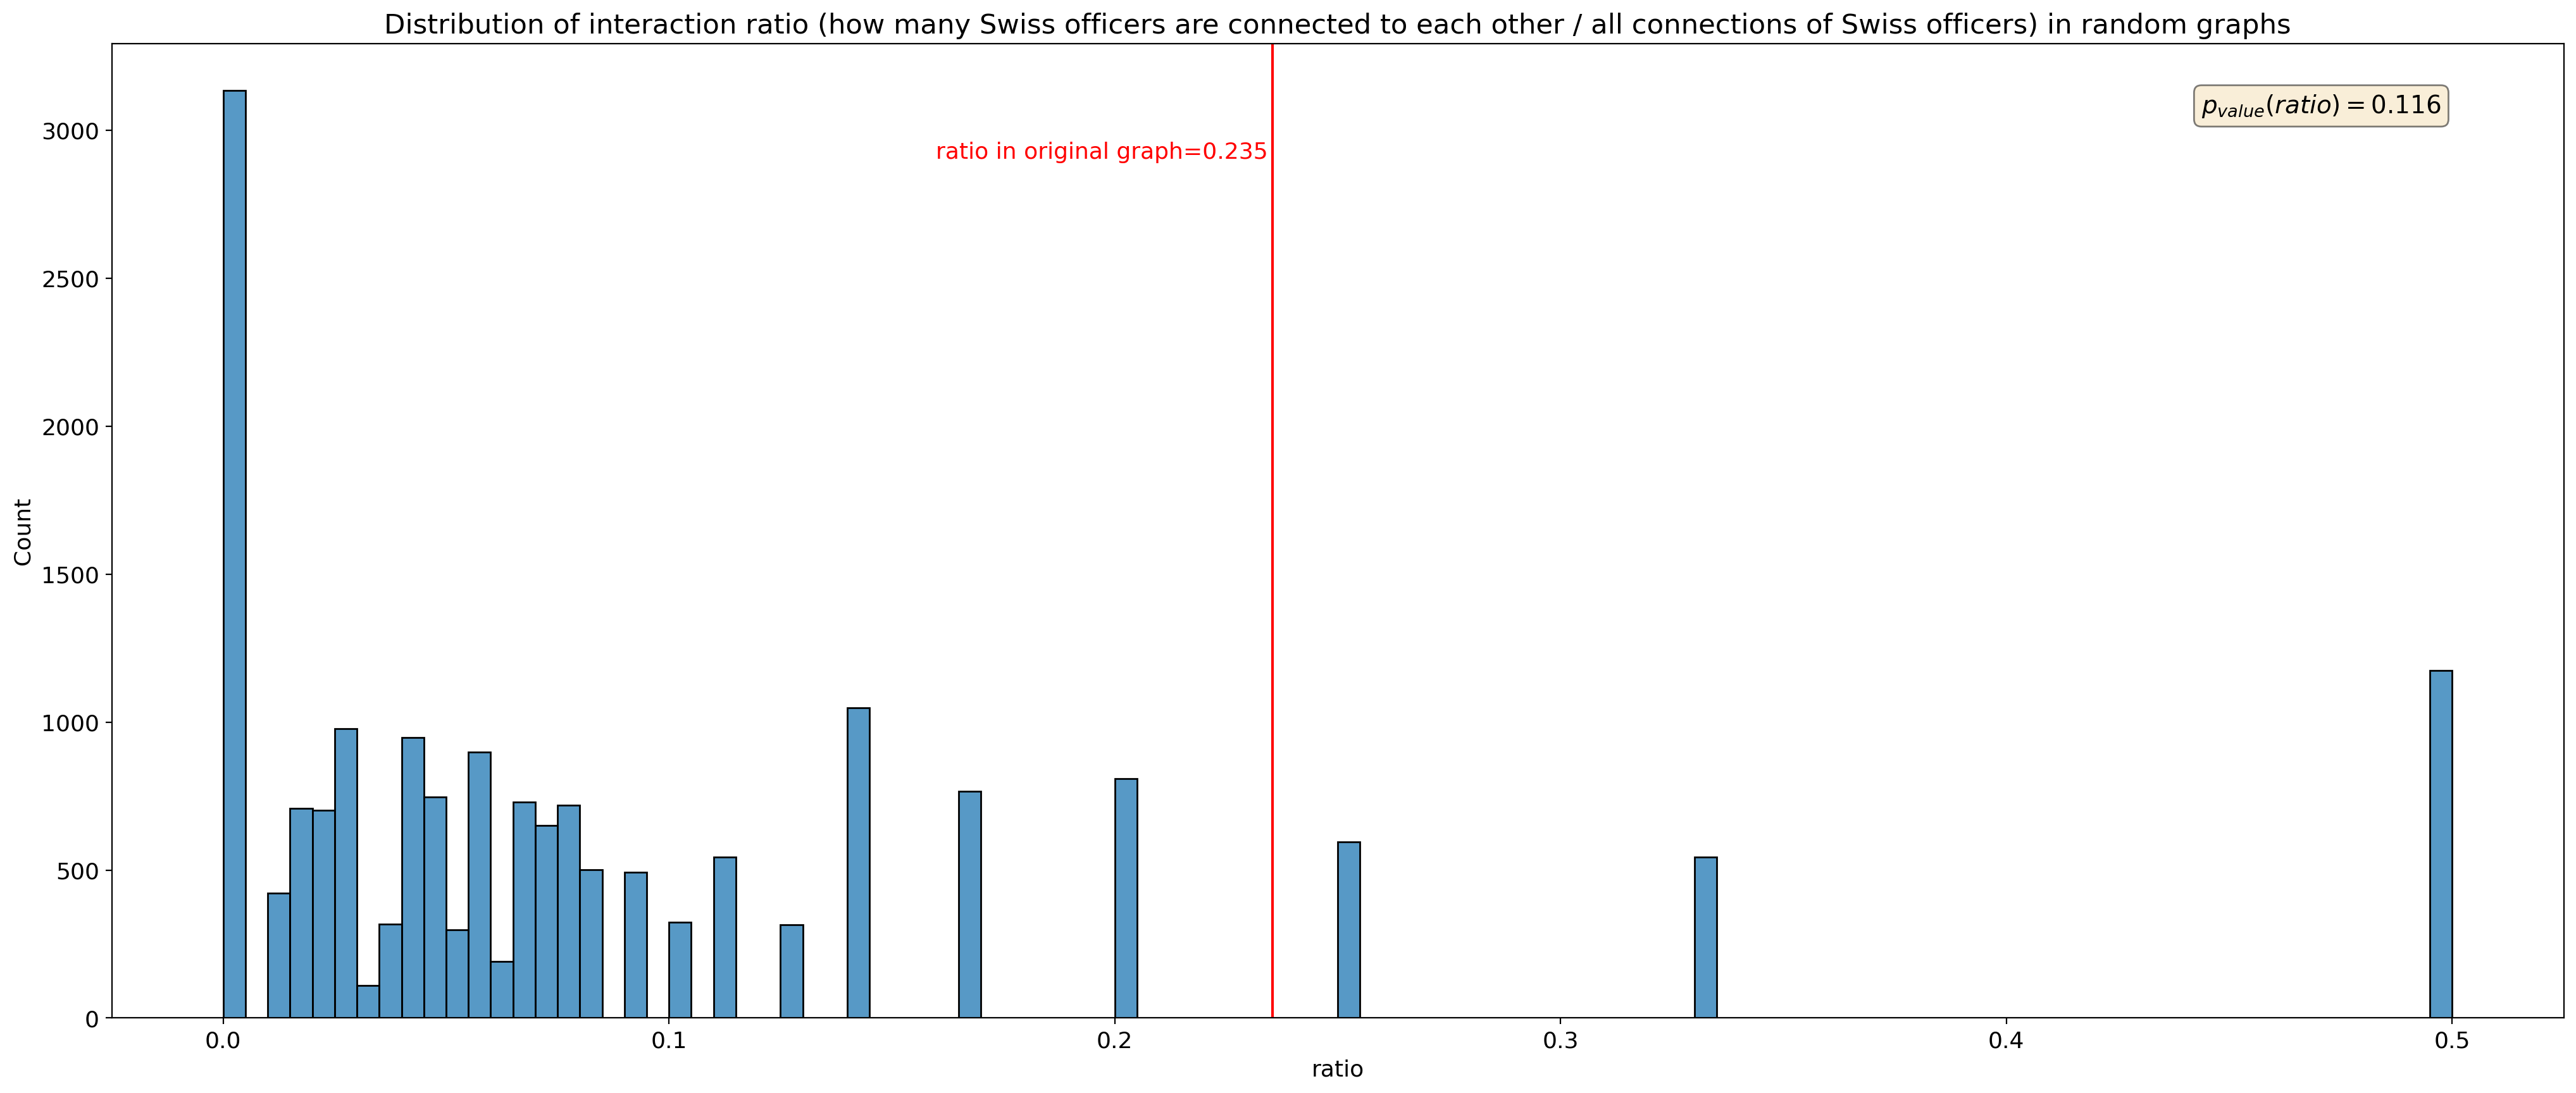

Im obigen Plot ist die Verteilung des Verhältnisses der Anzahl Verbindungen zwischen schweizer Officers und totale Anzahl Verbindungen von schweizer Officers zu erkennen.  
Das Histogram zeigt dabei die Verteilung des Verhältnisses bei zufälligen Graphen.  

Das Verhältnis von 0.235 bedeutet, dass die schweizer Officers nur zu 23.5% mit anderen inlänischen Officers zusammen eine Offshore-firma führen.  
Bedeutet also ein Grossteil sitzt mit ausländischen Officers im Vorstand einer Firma.  

$$
\begin{align*}
H_0 &: \text{Verhältnis} \leq \text{Verhältnis}_{\text{zufällig}} \\
H_1 &: \text{Verhältnis} > \text{Verhältnis}_{\text{zufällig}}
\end{align*}
$$

Der Hypothesentest zeigt allerdings, dass das erhaltene Ergebnis nicht statistisch signifikant ist und somit $H_0$ nicht abgelehnt werden kann.